In [1]:
#Import Necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import numpy as np

After completing the Data Wrangling steps in the first notebook, we can load in our cleaned and combined dataframes from the CSV files we stored them in and begin to work on some EDA (exploratory data analysis) to answer questions we have regarding the data.

In [2]:
#Load in dataframes created in the Data Wrangling portion
df_2016 = pd.read_csv('recycling_districts_2016')
df = pd.read_csv('recycling_districts_all')
df_month = pd.read_csv('recycling_districts_monthly')

The 3 dataframes loaded above include the combined datasets of NYC recycling rates and NYC community district level demographic data. The main dataset that will be used in EDA and to build a ML model is the 2016 data (df_2016) since we do not have district level demographic data for all of the time periods included in the NYC recycling rates dataset (2016-2019). Since the district level data is based on 5-year estimates from 2012-2016, the 2016 recycling data most closely matches this for analysis.

Additionally, I have loaded in the dataframe containing the recyling data beyond 2016 (df and df_month) since we can still use it to compare the changes in rates over time - ie. time as a univariate relationship.

The NYC recycling dataset includes not only annual data, but monthly data from 2016-2020. As such the two additional dataframes - 'df' and 'df_month' - can be used to examine the relationship time has over recycling rates. The monthly data allows us enough points to visualize the overall distribution in scatter plot as shown below.

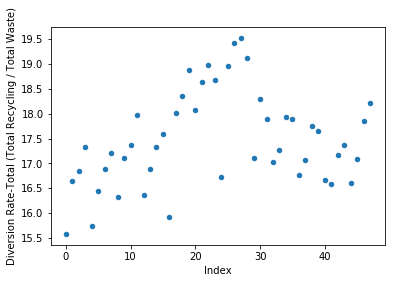

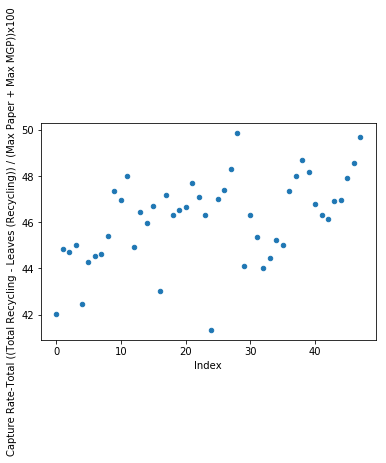

In [3]:
#Plot diversion and capture rates across months
df_month.plot(x='Index', y='Diversion Rate-Total (Total Recycling / Total Waste)', kind='scatter')
df_month.plot(x='Index', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', kind='scatter')
plt.show()
#df_month[['FullDate', 'Diversion Rate-Total (Total Recycling / Total Waste)']]

As you can see in the scatter plot above, the overall trend is positive as the rates increase from months January 2016 through December 2019, with a few dips and outliers mixed in. We now want to measure the pearson correlation coefficient to better quantify what degress of positive correlation. As shown below, both Diversion and Capture rates show a slight positive correlation to time, but of the two, only capture rate is statistically significant with a p-value below .05. This suggests that recycling habits may be improving throughout the city steadily.

In [4]:
#Correlation and p-value of time vs diversion & capture rate
print(stats.pearsonr(df_month['Index'], df_month['Diversion Rate-Total (Total Recycling / Total Waste)']))
print(stats.pearsonr(df_month['Index'], df_month['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']))

(0.25915055627812239, 0.075298074868220641)
(0.48457512501541133, 0.0004827582736970531)


While we were able to take a quick look at the changes of diversion and capture rates through time in months in the previous scatter plot, the df_months dataframe aggregated the district level data to an average for each month. As such we aren't able to see how the distribution of rates may vary across the 5 NYC boroughs and 59 districts. In order to preserve the district level data as well as the changes over time, the other dataframe loaded ('df') contains annual data averaged by month for the years 2016-2019 combined with district data.

With this dataframe, we can take a look on a larger scale of how the rates changed in a 4-year span along with the distribution across districts. For this, we can draw a box plot which can show the percentile distribution of rates across all 59 districts broken down by year.

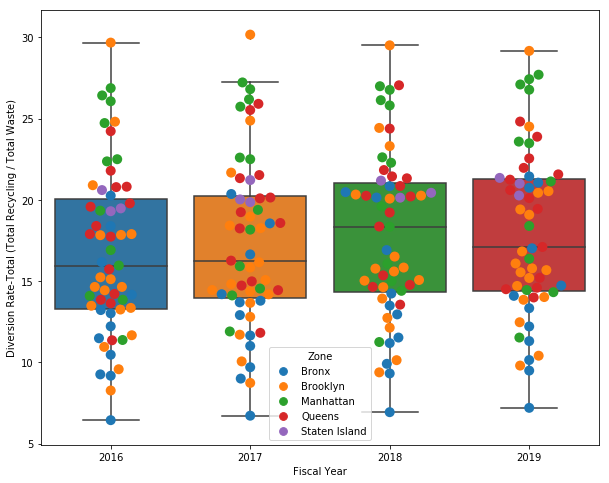

In [6]:
#Visualize the Diversion Rates over time from 2016-2019
sns.boxplot(x='Fiscal Year', y='Diversion Rate-Total (Total Recycling / Total Waste)', data=df)
sns.swarmplot(data=df, x='Fiscal Year', y='Diversion Rate-Total (Total Recycling / Total Waste)', size=10, hue='Zone')
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

The above plot display the percentile distributions of diversion rates for each year with color coding to show the breakdown of each point into the NYC borough/zone they are in. The box specifically shows where the middle 50% of the rates in a single year are between, around 13-22. Based on the upper and lower boundaries of the box (representing the 25th and 75th percentiles) we can see clearly that the diversion rates are moving slowly incrementally upwards towards 15 and 22, moving the middle 50% upward.

However, based on the median rates, there appears to be a dip from 2018 to 2019 after an initial jump from 2017. This is possibly due to there being more outliers, or points above the 75th percentile in 2018. Let's next take a look at the total capture rates in the same manner.

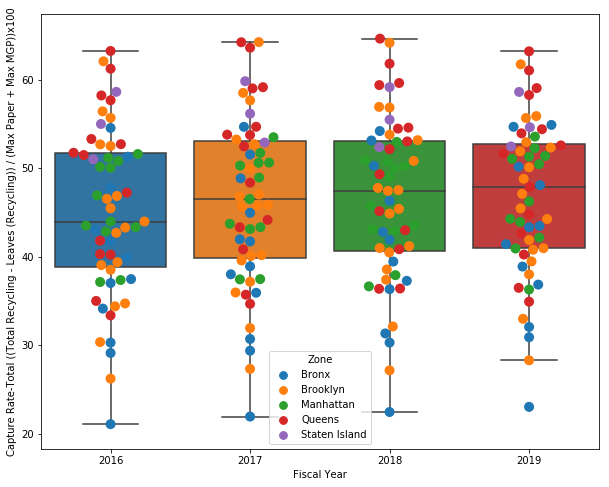

In [8]:
#Visualize the Capture Rates Total over time from 2016-2019
sns.boxplot(x='Fiscal Year', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', data=df)
sns.swarmplot(data=df, x='Fiscal Year', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', size=10, hue='Zone')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

Based on the plot above, here there appears to be a more distinct positive trend with the median capture rates along with the upper and lower percentiles increasing each year by a few points. Since capture rate measures the total recyclable material produced successfully recycled, this suggests that tendency to recycle materials that are known to be recyclable is increasing. 

We would likely need more data to explore the dip in capture rates, but given the outliers, one possibility is that the percentage of waste materials to recyclable material may have increased in certain districts due to costs or need for non-renewable resources.



While the box plots do show a breakdown of points by borough/zone based on the legend, it does beg the question as to what the overall distribution of rates across each borough is, and if each borough has a different distribution than the others. To explore this, we can similarly draw box plots for each zone in a single year. As mentioned previously, since we do not have demographic data from 2017-2019, we will isolate the 2016 data from the 'df_2016' to explore district data moving forward. 

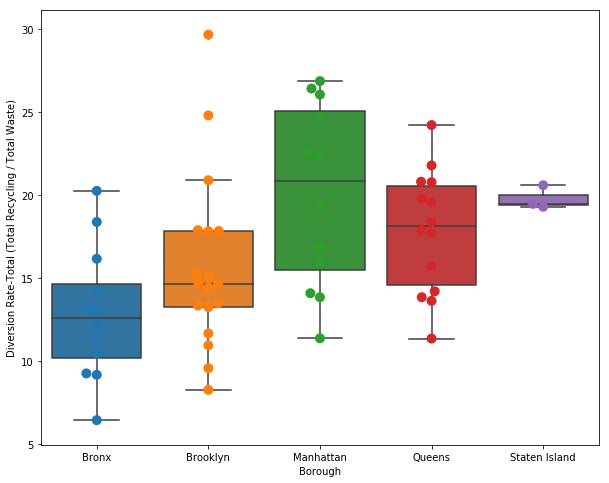

In [10]:
#Visualize the Diversion Rates in 2016 Across Boroughs
sns.boxplot(x='Zone', y='Diversion Rate-Total (Total Recycling / Total Waste)', data=df_2016)
sns.swarmplot(data=df_2016, x='Zone', y='Diversion Rate-Total (Total Recycling / Total Waste)', size=10)
plt.xlabel('Borough')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

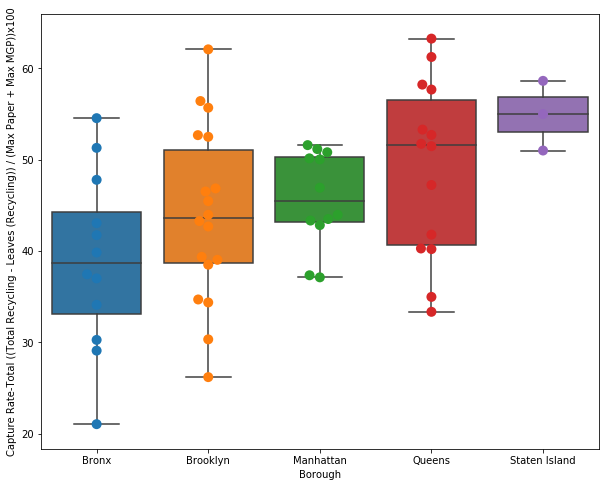

In [11]:
#Visualize the Capture Rates in 2016 Across Boroughs
sns.boxplot(x='Zone', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', data=df_2016)
sns.swarmplot(data=df_2016, x='Zone', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', size=10)
plt.xlabel('Borough')
plt.rcParams['figure.figsize'] = [10, 8]

plt.show()

As we can see in the plots above, there is a clear difference in distribution between the 5 boroughs. This suggests that there is more to explore with regards to the district data demographic, community, and economic indicators across the boroughs. 

Given that two of the major categories of indicators include age groups and races, both of which can be seen as a percentage of the total, it leads the question of what the percentage distribution of race and age are across the boroughs. Knowing this may give us further insight into potential factors of a community influence the collective success of their recycling programs.

Below we are creating separate dataframes with the 5 race groups (White, Black, Asian, Hispanic, Other) and 4 broader age groups (minors, young adults, middle age, senior) in the wrangled dataframe.

In [12]:
#Break down 2016 demographic data by race and age group in order to plot charts
df_boroughs = df_2016.groupby('Zone', as_index=False).aggregate('mean')
races = ['Zone', 'pct_white_nh', 'pct_black_nh', 'pct_asian_nh', 'pct_other_nh', 'pct_hispanic']
ages = ['Zone', 'minors_under20', 'youngadults_20-39', 'middleaged_40-59', 'senior_over60']
zones = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
race_df = df_boroughs[races].melt(id_vars='Zone', var_name="Race", value_name="Percentage").sort_values(['Zone', 'Race'])
age_df = df_boroughs[ages].melt(id_vars='Zone', var_name="Age", value_name="Percentage").sort_values('Zone')

Now that we have dataframes of the 5 boroughs along with the percentage of age groups and races, we can visualize the distribution of both using pie charts, as shows below.

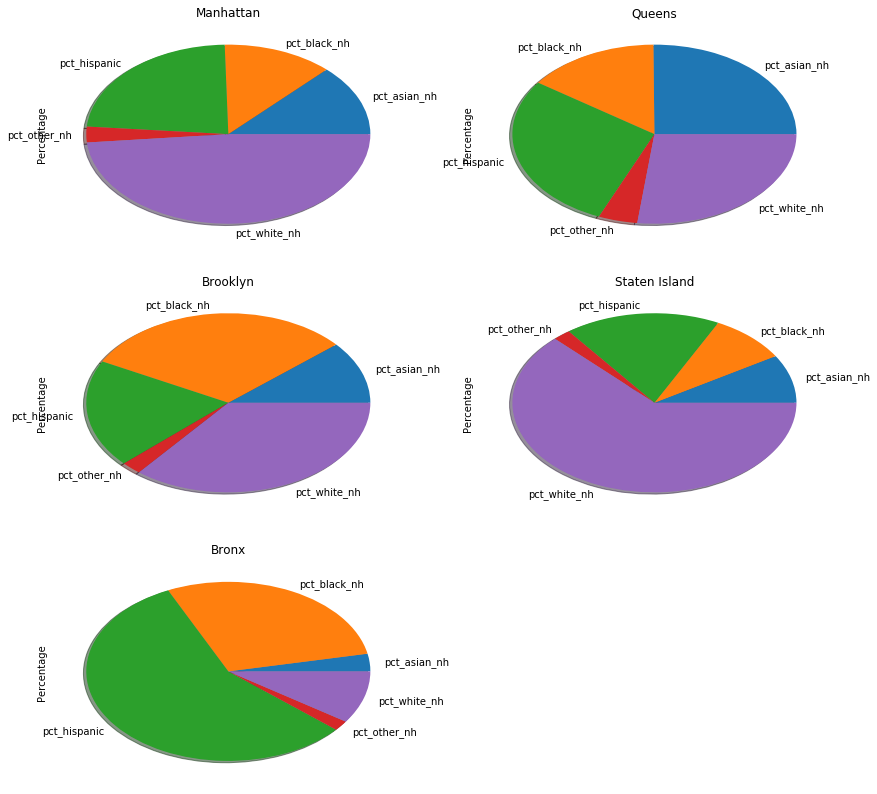

In [13]:
#Plot pie charts of Race across borough
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.delaxes(axes[2,1])

race_df[race_df['Zone'] == 'Manhattan'].plot(ax=axes[0,0], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Manhattan', legend=False, shadow=True)
race_df[race_df['Zone'] == 'Queens'].plot(ax=axes[0,1], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Queens', legend=False, shadow=True)
race_df[race_df['Zone'] == 'Brooklyn'].plot(ax=axes[1,0], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Brooklyn', legend=False, shadow=True)
race_df[race_df['Zone'] == 'Staten Island'].plot(ax=axes[1,1], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Staten Island', legend=False, shadow=True)
race_df[race_df['Zone'] == 'Bronx'].plot(ax=axes[2,0], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Bronx', legend=False, shadow=True)
plt.show()

The above pie charts help to visualize the racial distribution across borough, and based on the fact that two of the boroughs with higher median recycling rates have a skewed distribution of racial groups towards while one of the lowest in the Bronx does as well, this suggests that the proportion of race in a district could potentially have an impact on recycling rates.

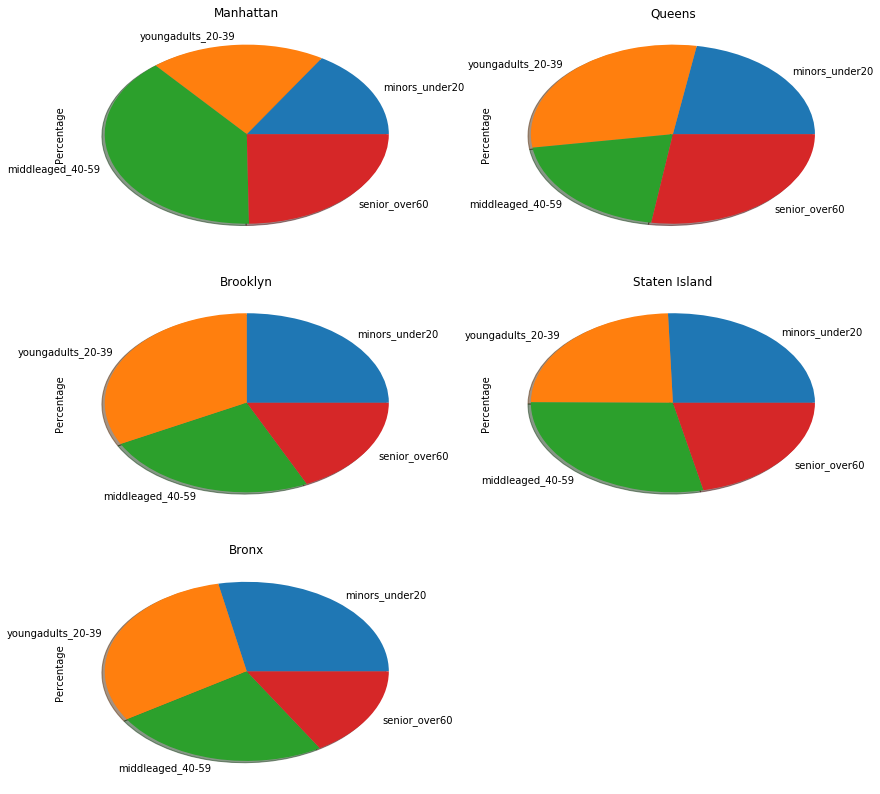

In [14]:
#Plot pie charts of Age Group across borough
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.delaxes(axes[2,1])

age_df[age_df['Zone'] == 'Manhattan'].plot(ax=axes[0,0], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Manhattan', legend=False, shadow=True)
age_df[age_df['Zone'] == 'Queens'].plot(ax=axes[0,1], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Queens', legend=False, shadow=True)
age_df[age_df['Zone'] == 'Brooklyn'].plot(ax=axes[1,0], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Brooklyn', legend=False, shadow=True)
age_df[age_df['Zone'] == 'Staten Island'].plot(ax=axes[1,1], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Staten Island', legend=False, shadow=True)
age_df[age_df['Zone'] == 'Bronx'].plot(ax=axes[2,0], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Bronx', legend=False, shadow=True)
plt.show()

The above pie charts show a more equal breakdown of age groups across boroughs, although a higher percentage of younger vs middle aged populatin in the Bronx vs. Manhattan may be indicative of distribution of age groups being a contributing factor towards recycling performance as well.

Since there are multiple variables that are present in the districts dataset and a few different rates, to further simplify the process of analyzing the relationships between each of them, we can create a list of all the X-variables (indicators) and Y-variables (recycling rates - diversion & capture).

In [58]:
#Create list of all possible X-variables in dataframe, which are the columns that are NOT the rates
#Create list of all possible Y-variables in dataframe, which are the columns that ARE the rates
rec_x_variables = list(df.columns[9:])
rec_y_rates = list(df.columns[4:8])

Now that we've broken down the variables into list, we can continue to explore the relationship between age and recycling rates further. As per the previous pie graphs, there are relatively even distributions of the 4 age groups across the boroughs. However, this is partially due to the fact that the age groups were condensed into 4 from the raw data which contains a breakdown in 5-10 year age spans from 0-80+. 

As such, we do have enough data to explore and answer the question, given the lower rates of recycling in districts with higher proportions of younger people, can we determine around what age group do people start to recycle more? We can plot this below on a bar chart by creating new dataframes with age group proportions and their corresponding rates across boroughs.

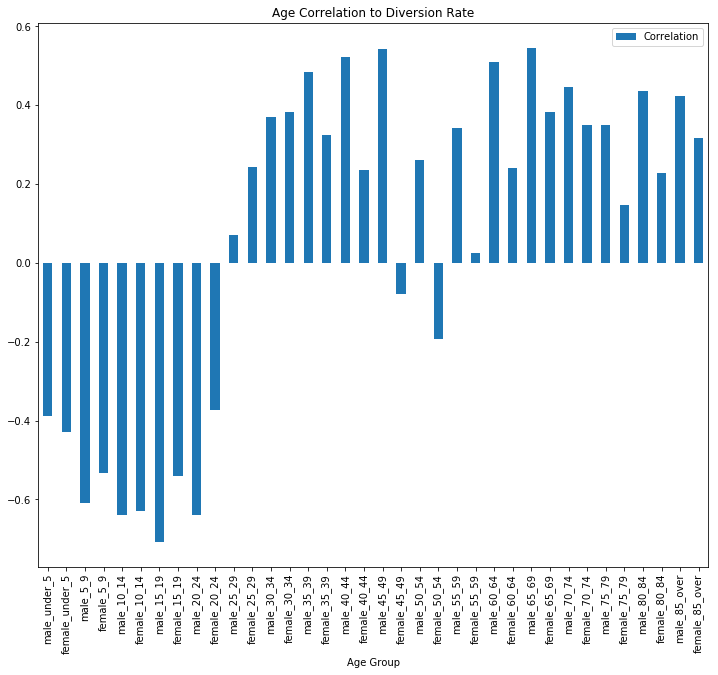

In [24]:
#Create list of age groups and their respective correlation to diversion rate
agegroup_list = rec_x_variables[16:52]

#Create dictionary of age groups and pearson correlation 
age_dict_div = {i:stats.pearsonr(df_2016[i], df_2016['Diversion Rate-Total (Total Recycling / Total Waste)'])[0] for i in agegroup_list}
age_dict_capt = {i:stats.pearsonr(df_2016[i], df_2016['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'])[0] for i in agegroup_list}

#Turn dictionary into dataframe in order to create bar graph in order of dictionary
age_corr_div = pd.DataFrame(age_dict_div.items(), columns=['Age Group', 'Correlation'])
age_corr_capt = pd.DataFrame(age_dict_capt.items(), columns=['Age Group', 'Correlation'])
age_corr_div.plot(kind='bar', x='Age Group', y='Correlation', figsize=[12,10])
plt.title('Age Correlation to Diversion Rate')
plt.xticks(rotation=90)
plt.show()

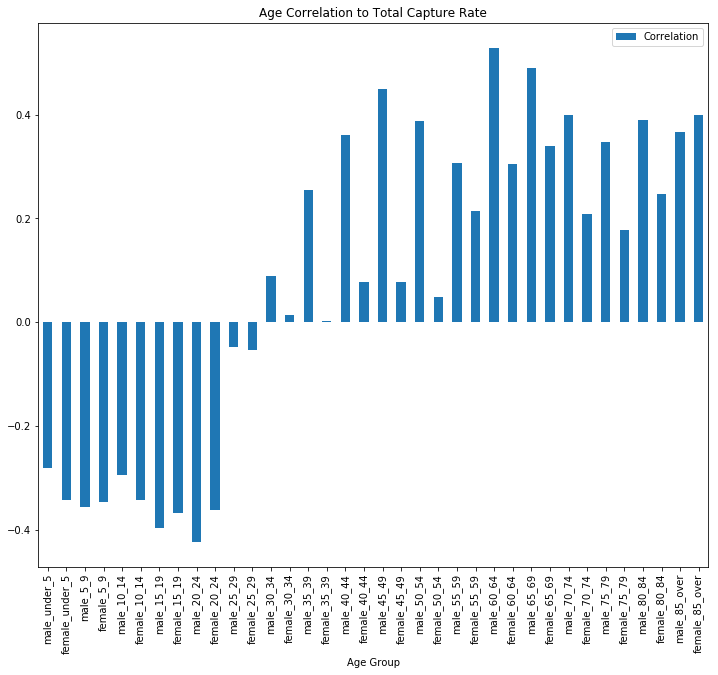

In [23]:
age_corr_capt.plot(kind='bar', x='Age Group', y='Correlation', figsize=[12,10])
plt.title('Age Correlation to Total Capture Rate')
plt.xticks(rotation=90)
plt.show()

Per these plots, the distribution suggests that around age 25 is when the proportion of the population in a community district is greater than that age leads a positive spike in recycling rates. This seems understandable due to education levels with regards to waste management and sustainability leading to decreased awareness and care for proper recycling habits. Moreover, it's posssible that there are other demographic factors correlated to an increased proportion of young people in a district, such as poverty rate and education levels. We will explore the relationship between each X-variable against the rates as well as against one another ahead.

There are a number of useful plots and data visualization methods that could be used to analyze, but considering that our primary goals are to find the relationship between the X-variables and Y recycling rates, one of the best ways to see this is through scatter plots. Likewise, it would be useful to see the overall distribution of points to get a gauge of the frequency of a measurement of X-variable, which can be done through a histogram. 

Fortunately, the Seaborn library has a tool called the jointplot which embeds a histogram within a scatter plot and includes annotations of the stats library Pearson correlation coefficient. Using this, we can use a for loop to iterate through each of the X-variables in the previously created lists so we can take a quick look at all of the relationships. Let's observe this below:

/Users/varunraja/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


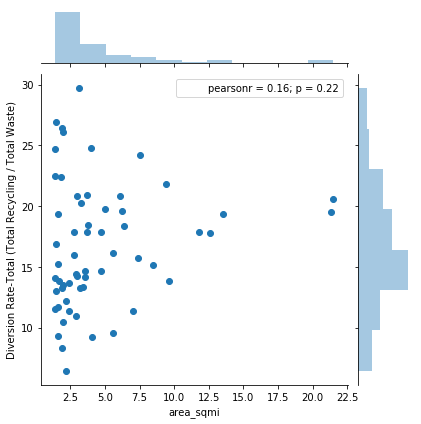

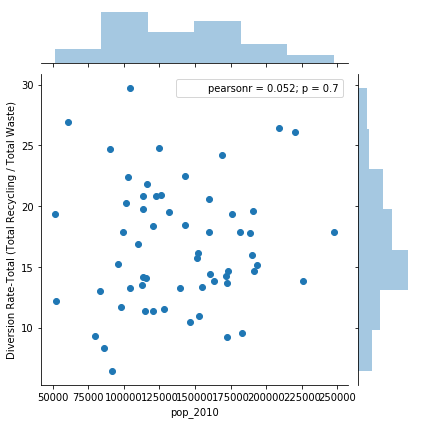

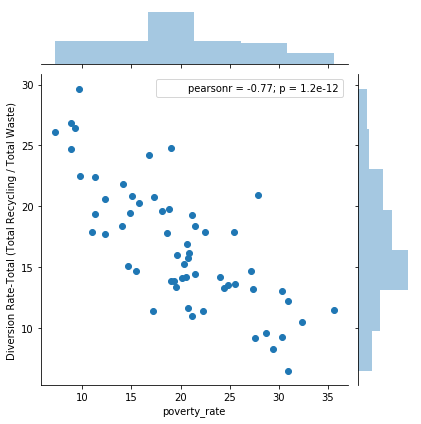

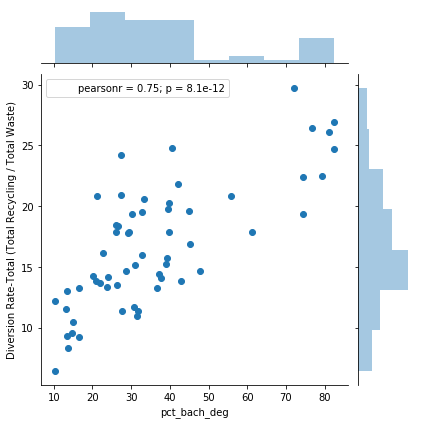

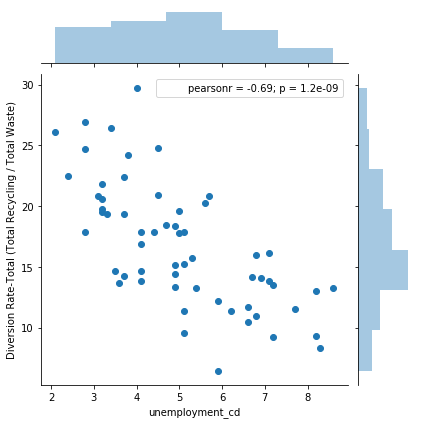

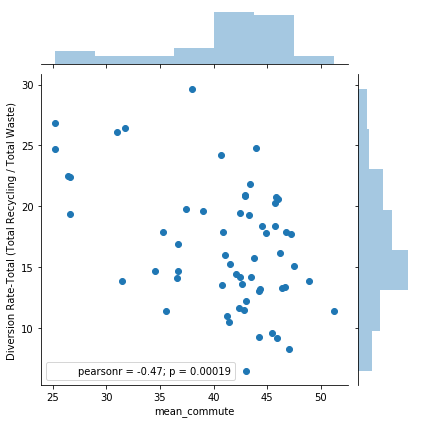

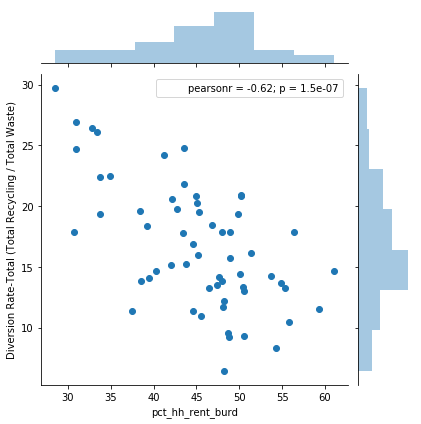

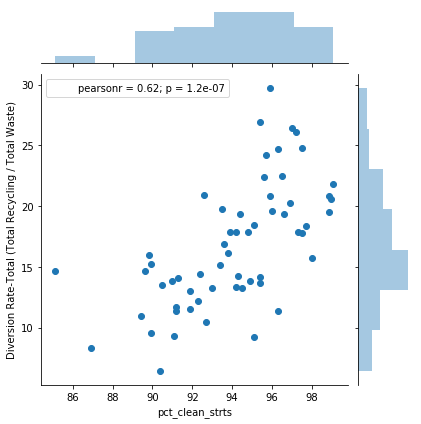

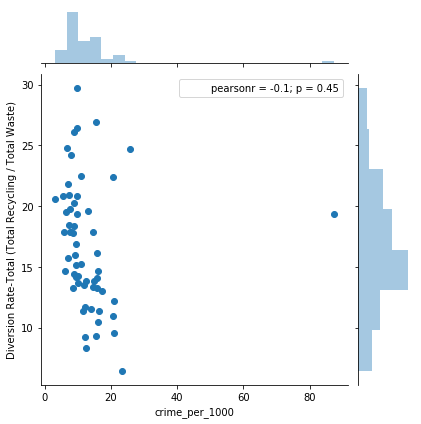

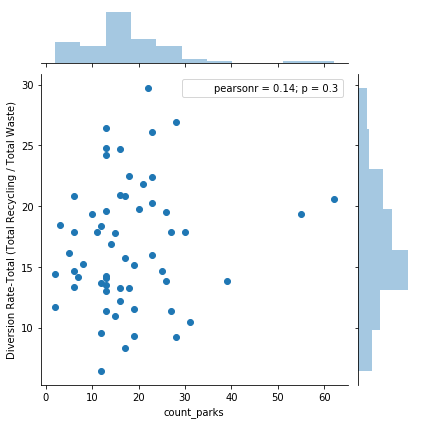

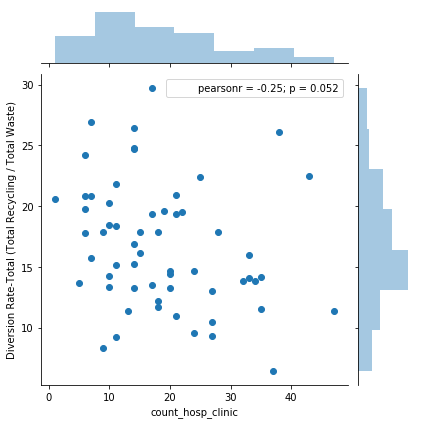

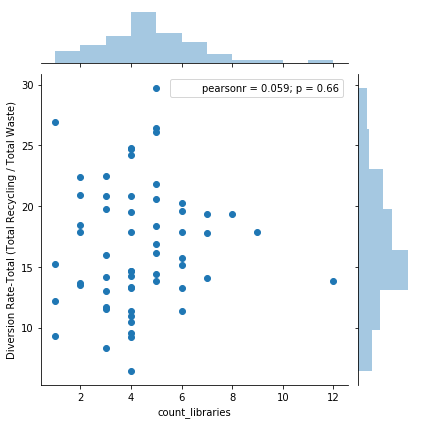

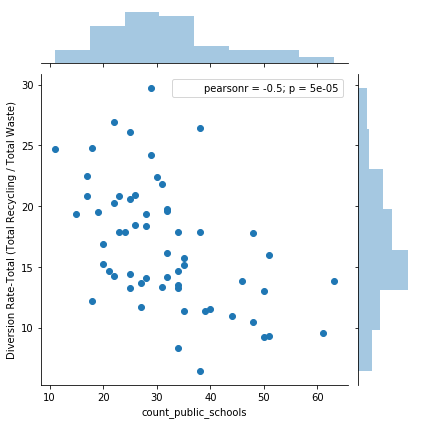

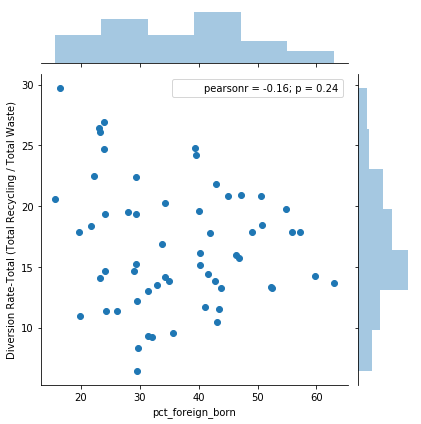

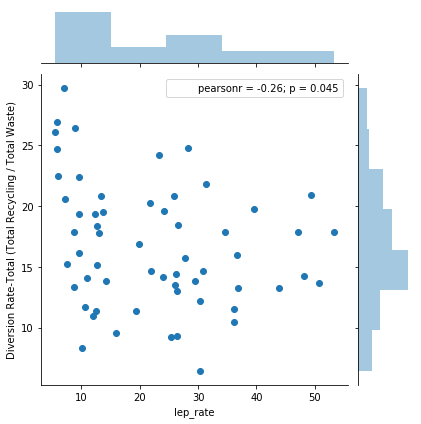

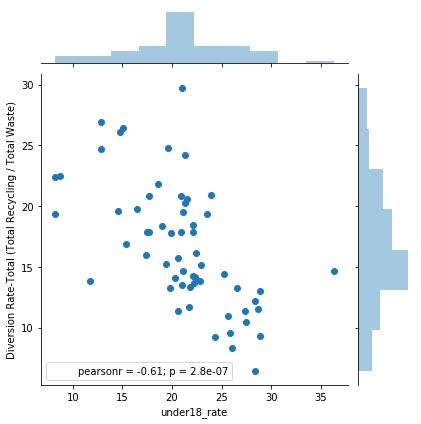

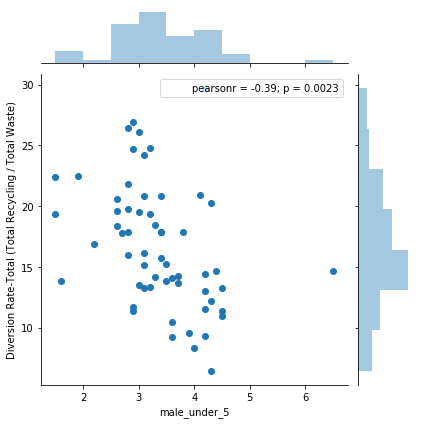

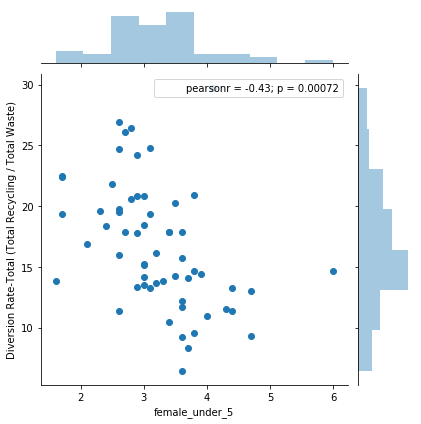

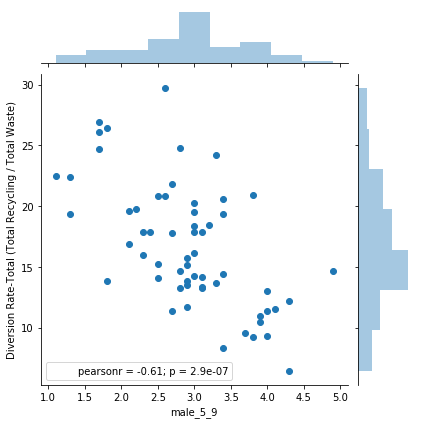

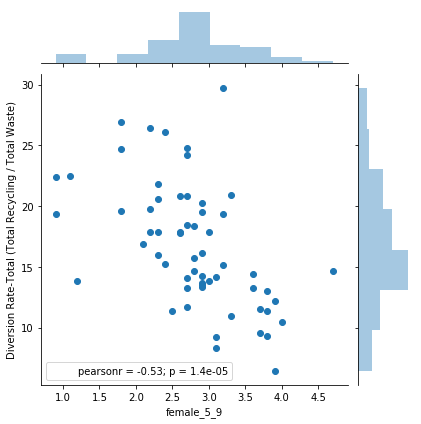

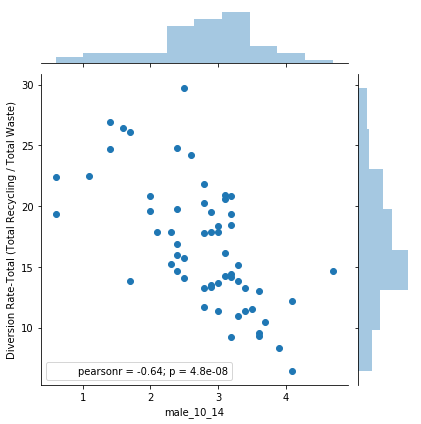

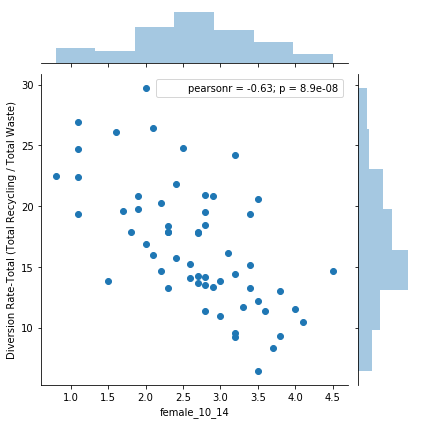

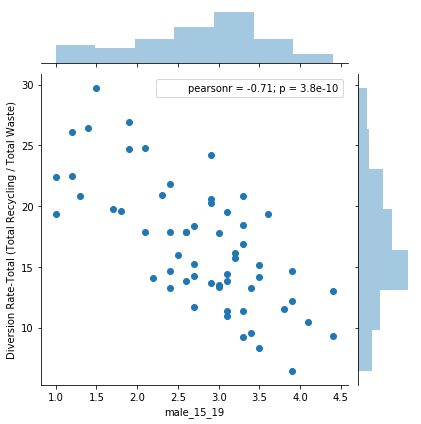

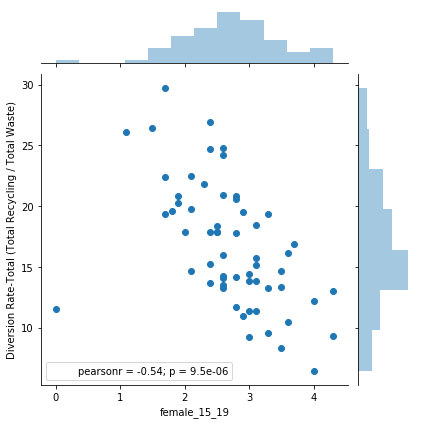

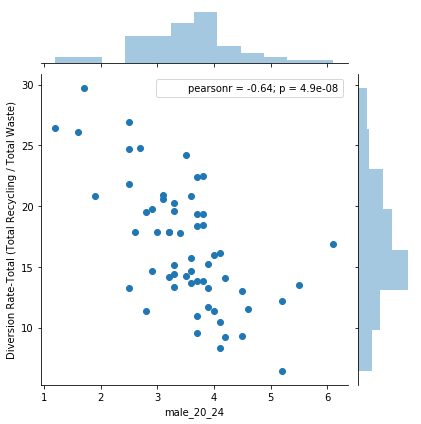

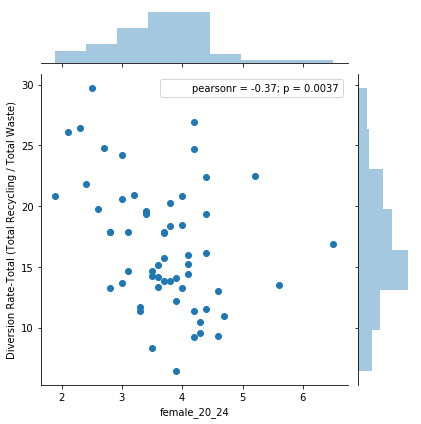

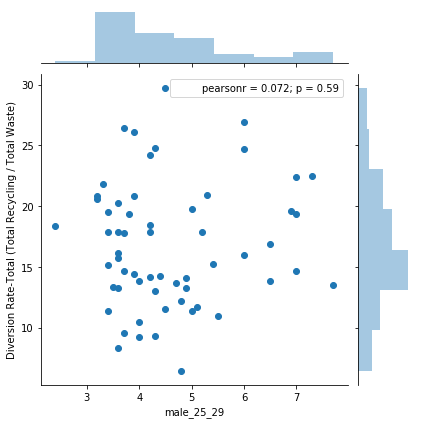

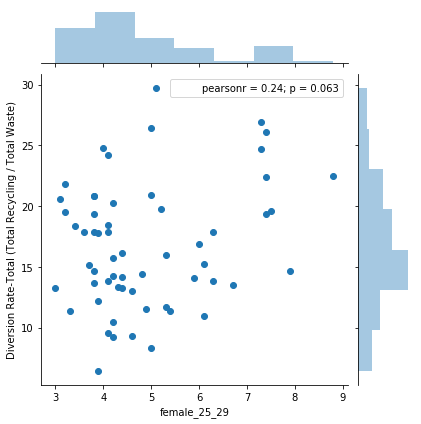

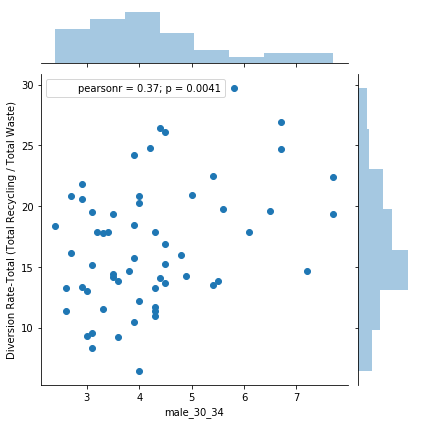

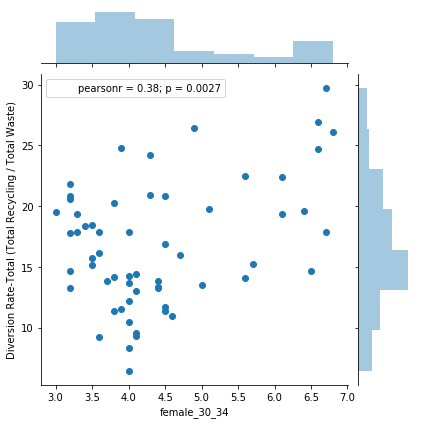

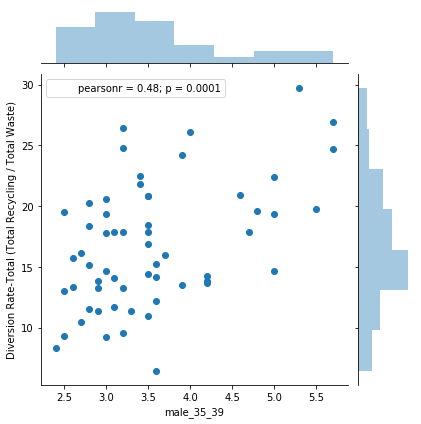

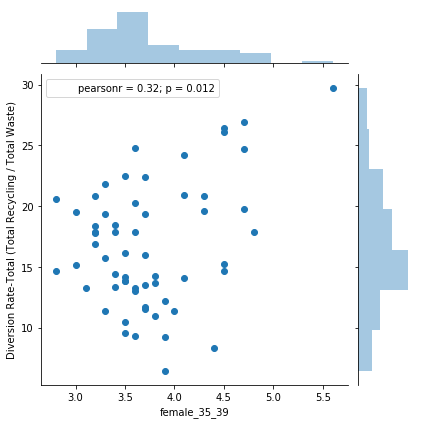

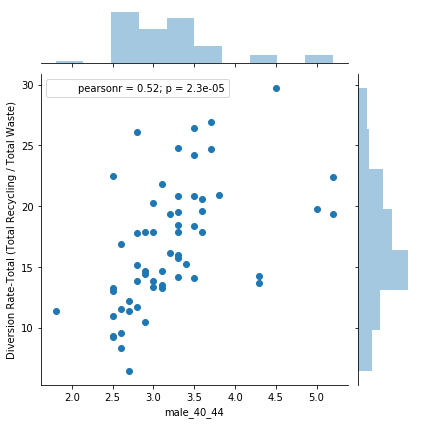

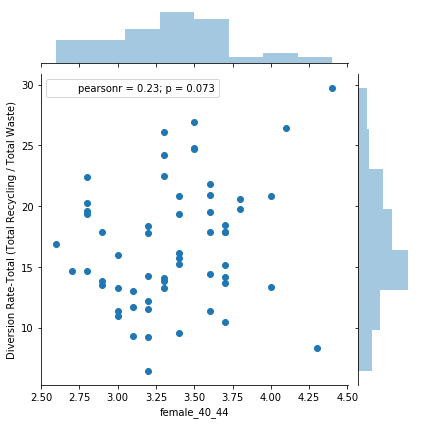

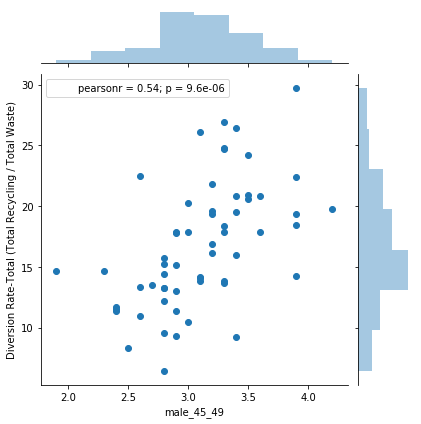

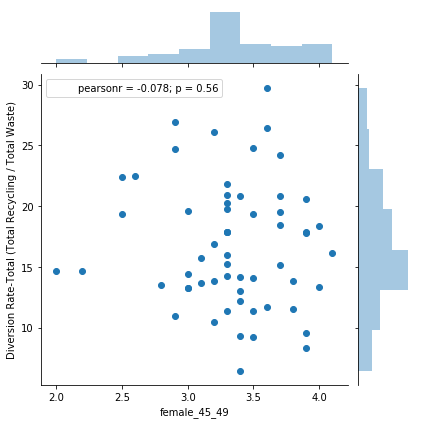

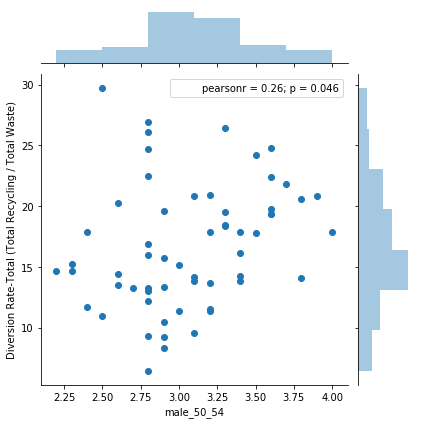

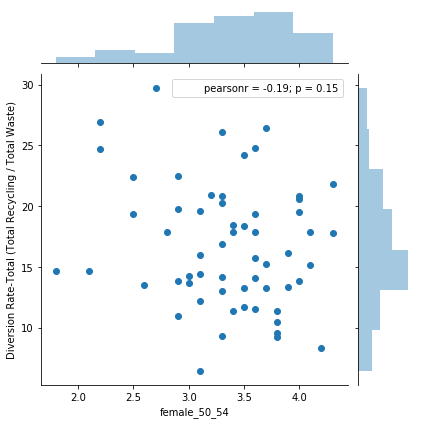

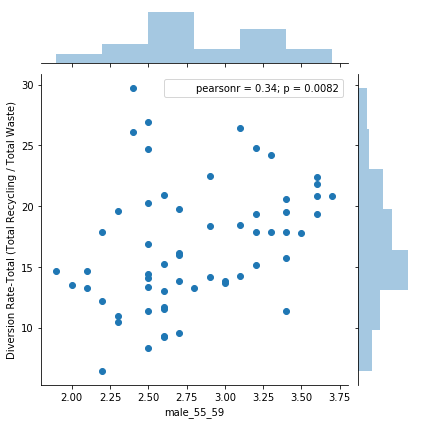

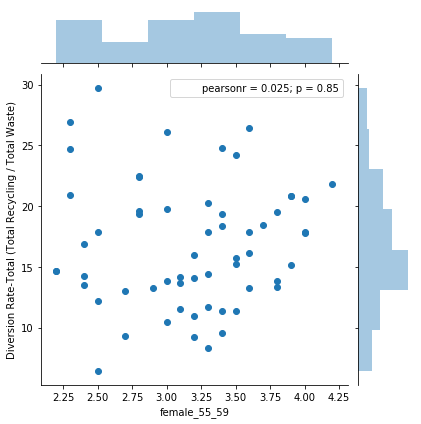

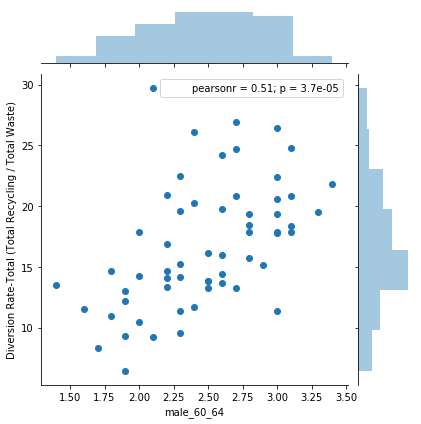

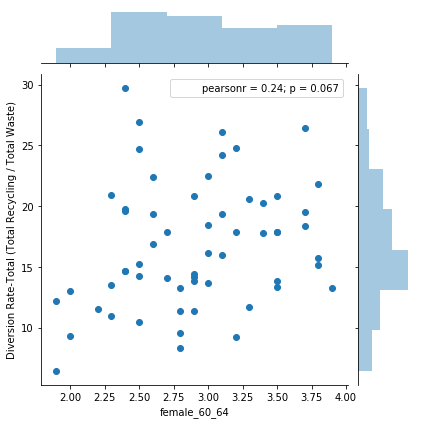

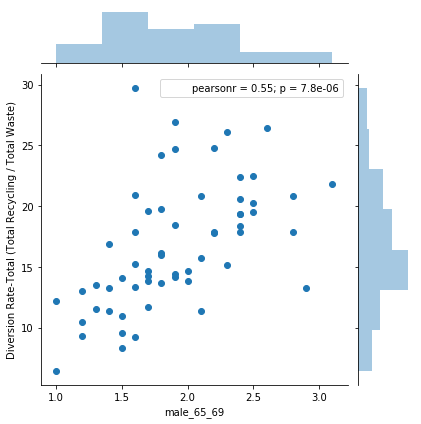

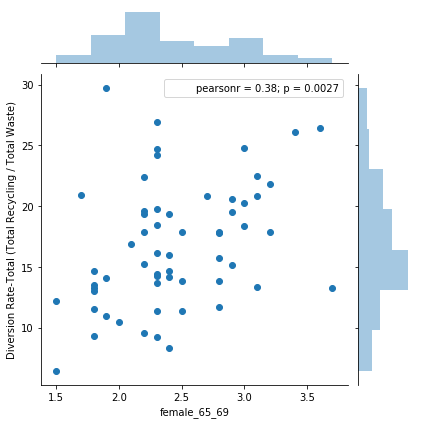

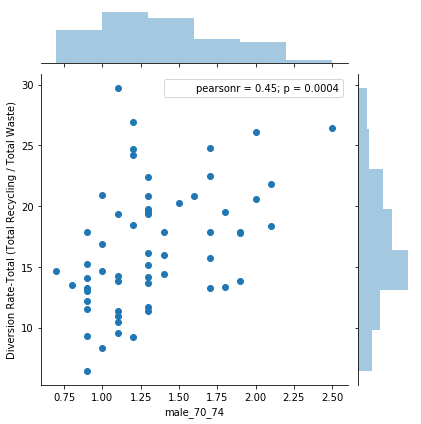

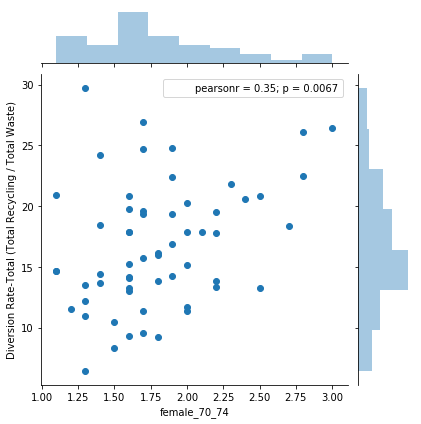

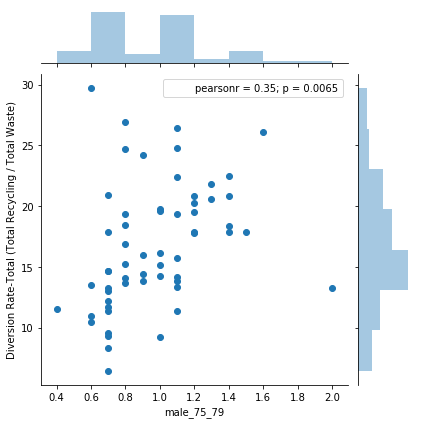

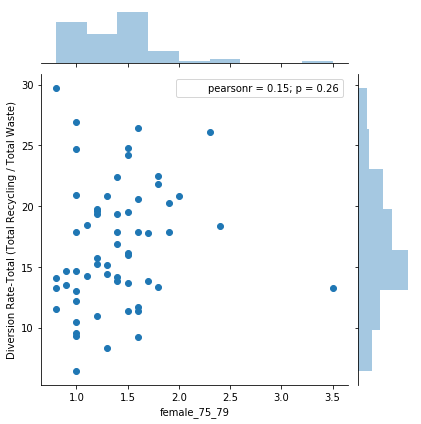

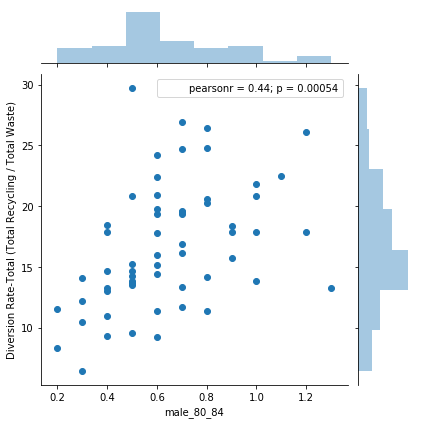

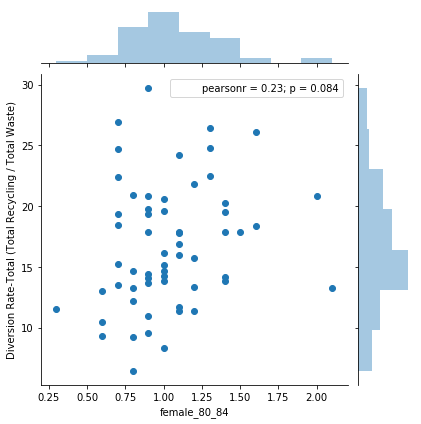

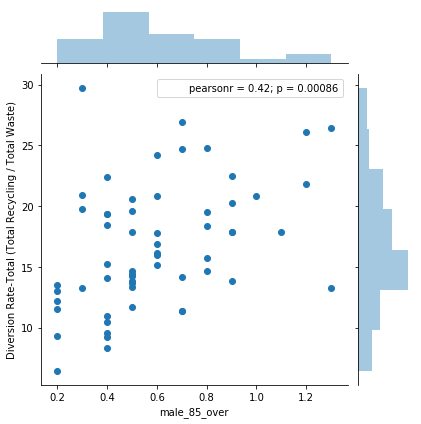

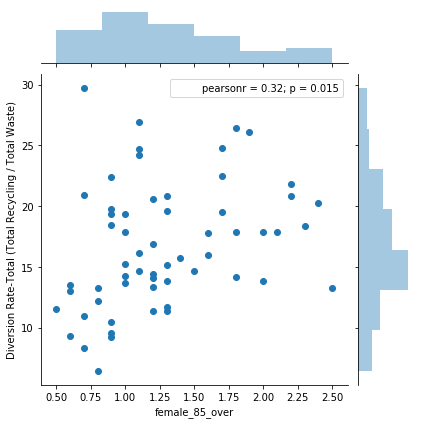

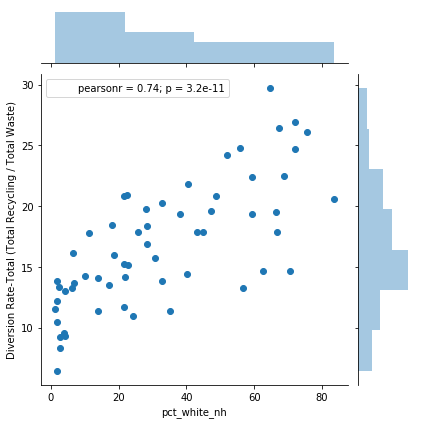

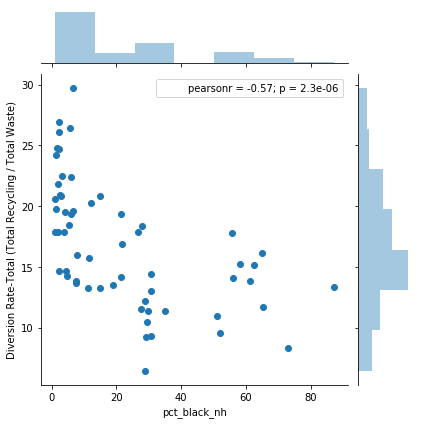

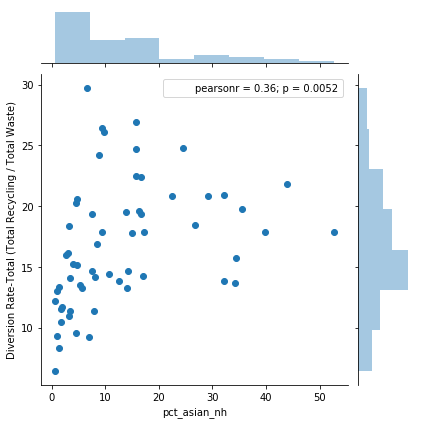

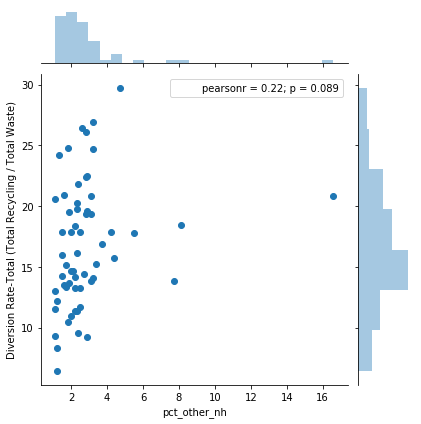

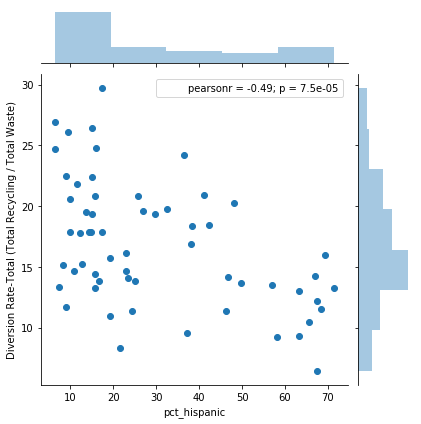

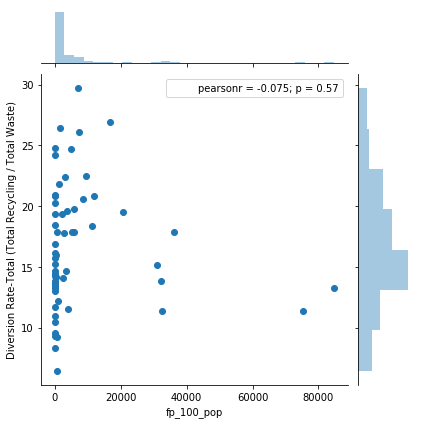

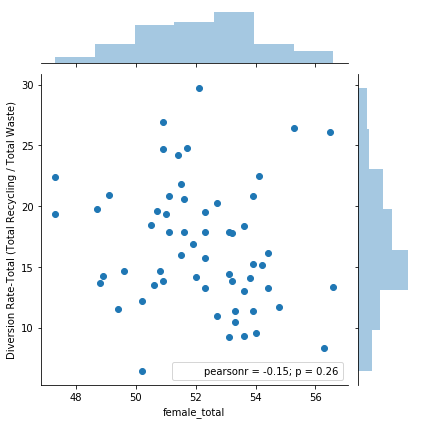

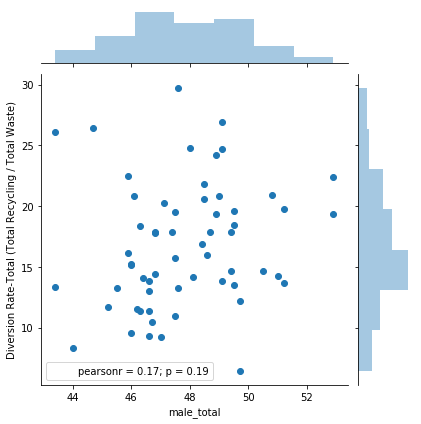

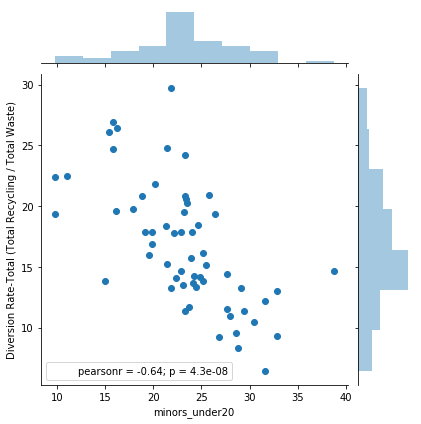

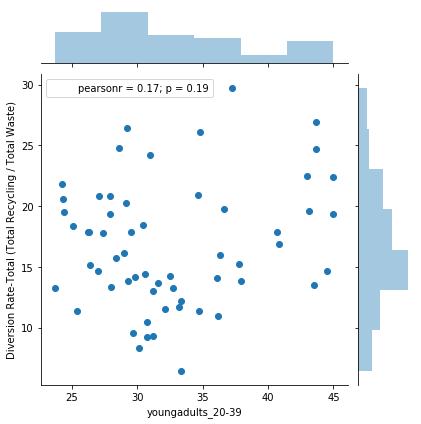

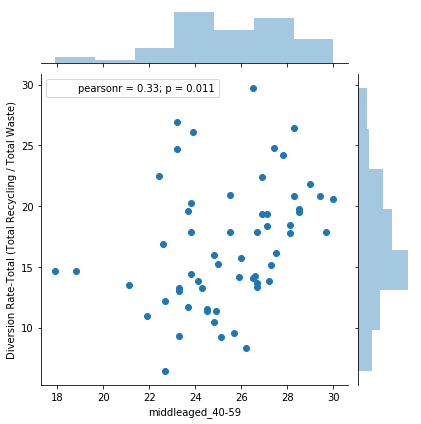

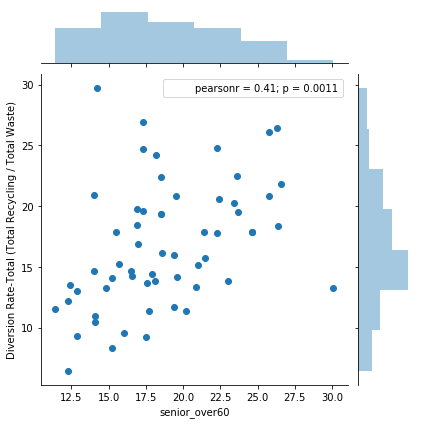

In [47]:
#Jointplots of all variables against Diversion Rates
for i in rec_x_variables:
    sns.jointplot(data=df_2016, x=i, y='Diversion Rate-Total (Total Recycling / Total Waste)', kind='scatter').annotate(stats.pearsonr)
    plt.show()

/Users/varunraja/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


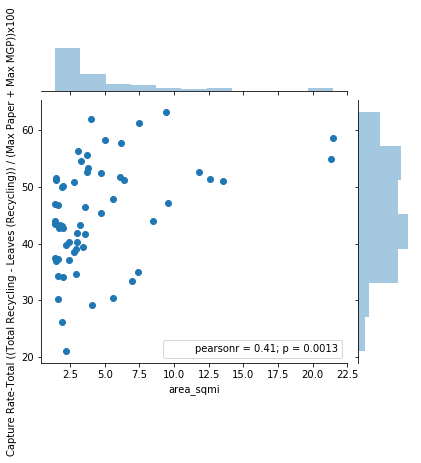

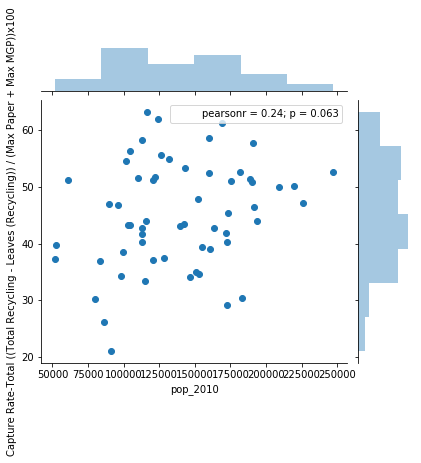

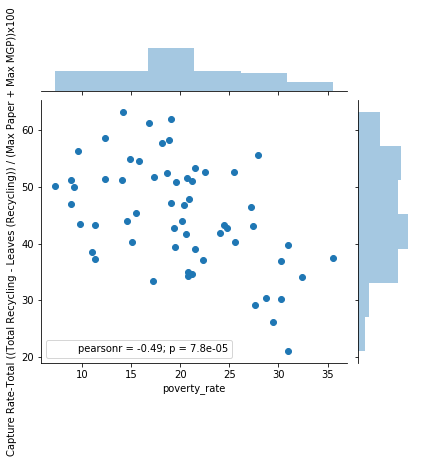

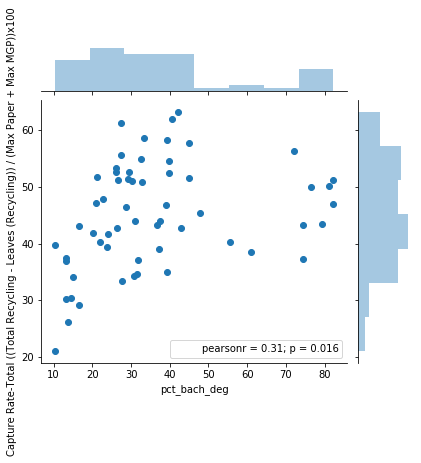

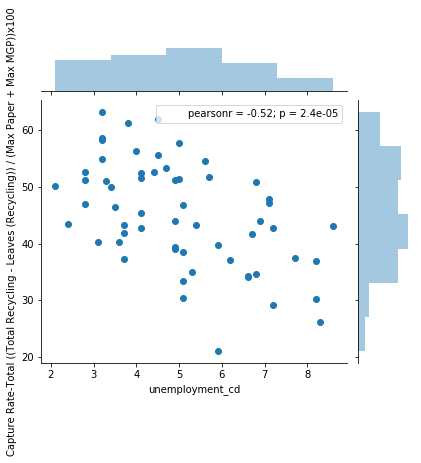

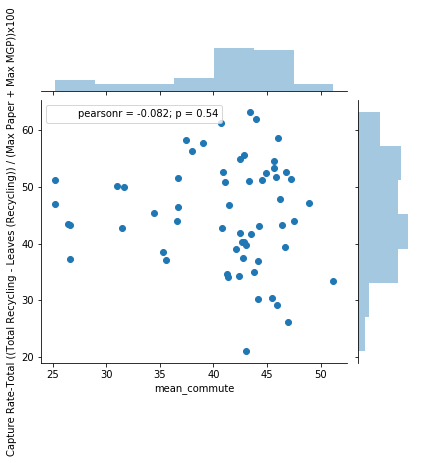

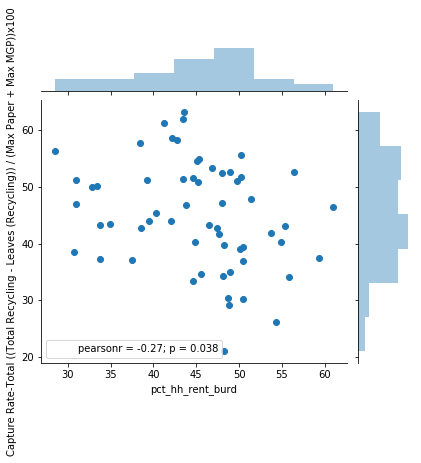

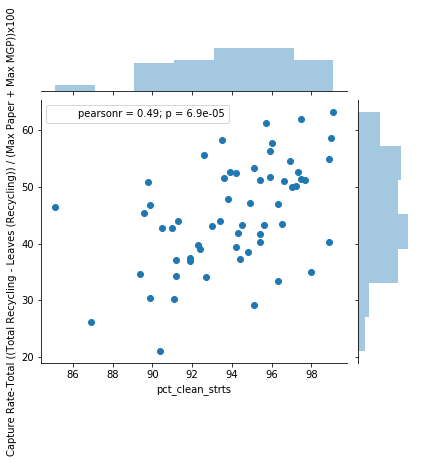

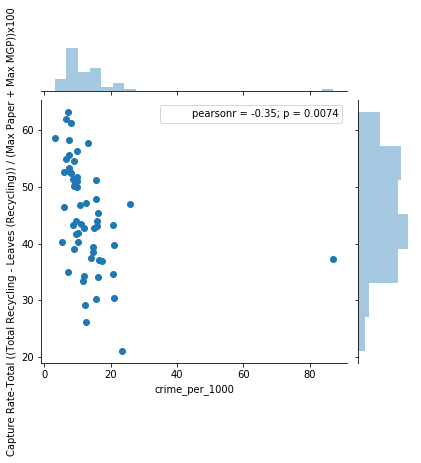

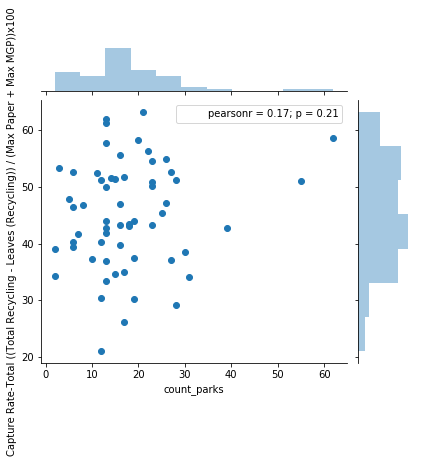

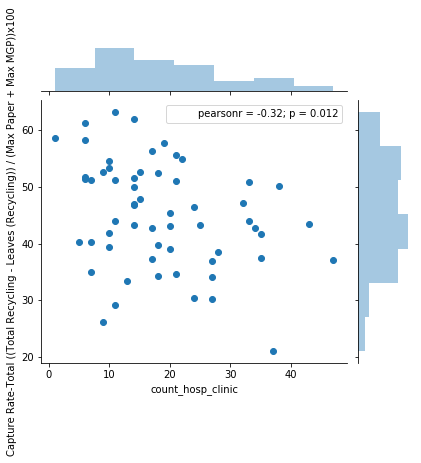

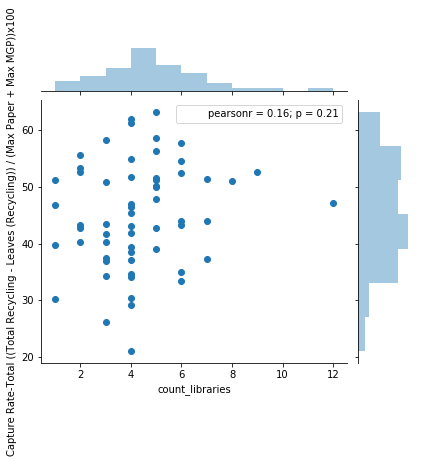

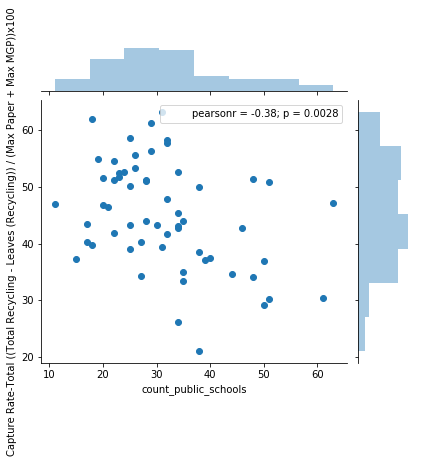

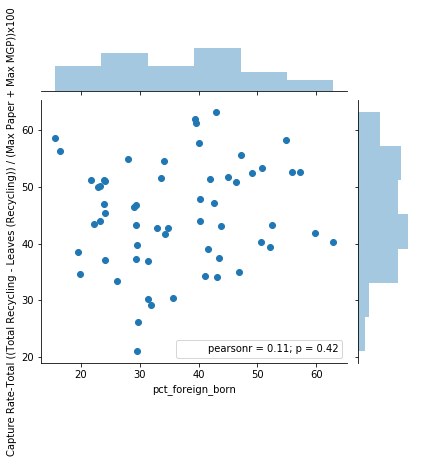

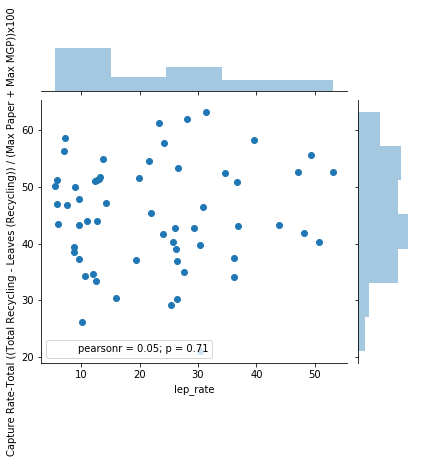

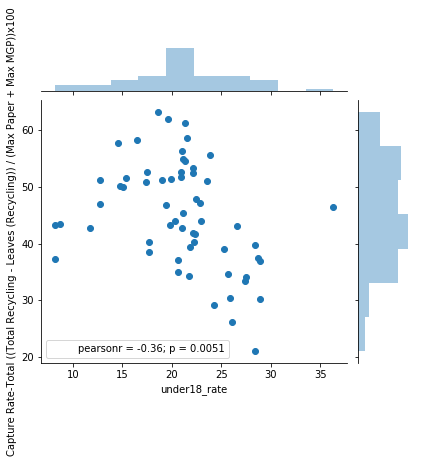

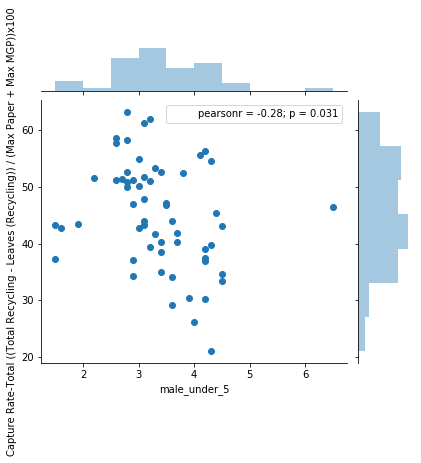

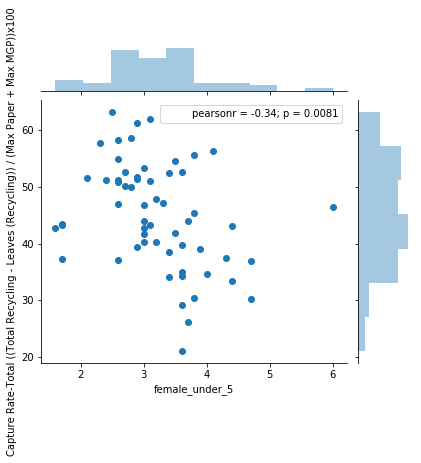

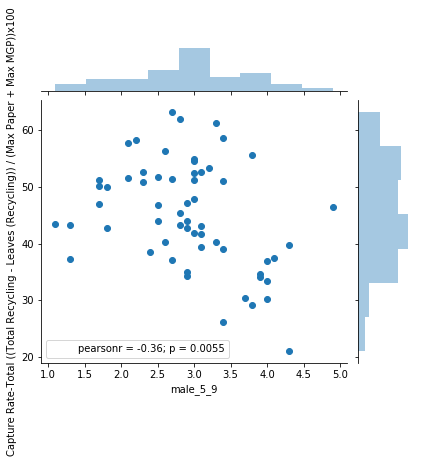

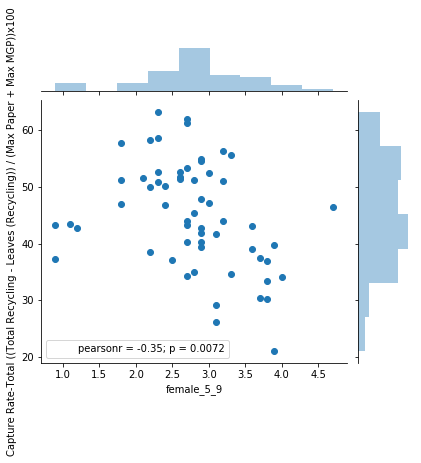

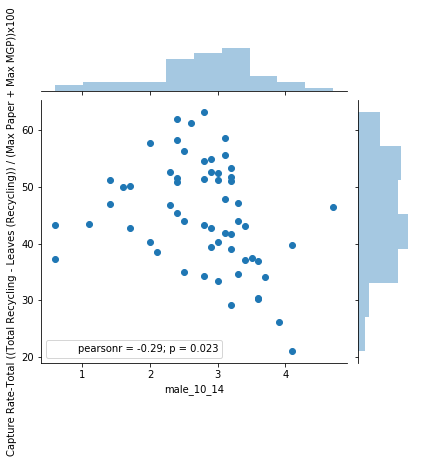

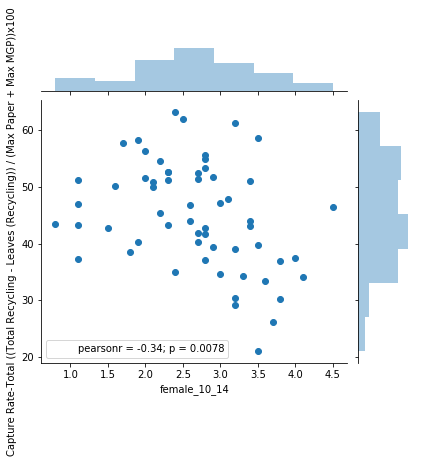

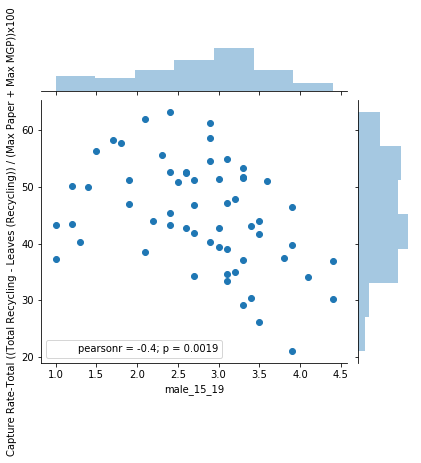

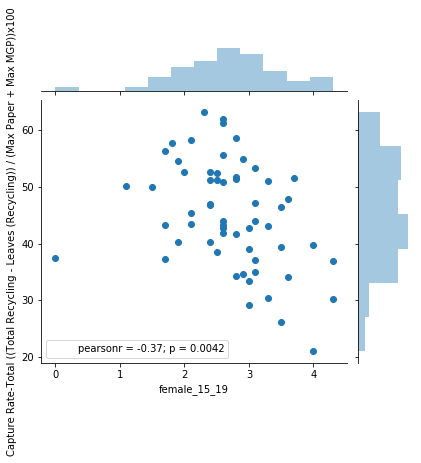

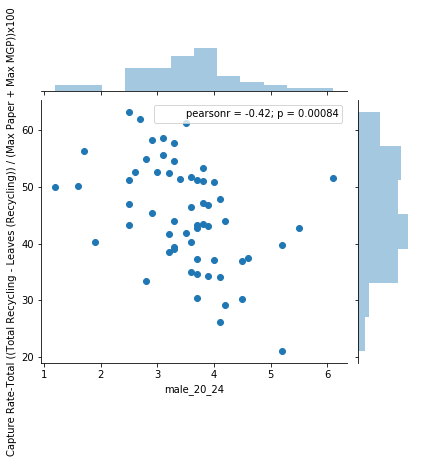

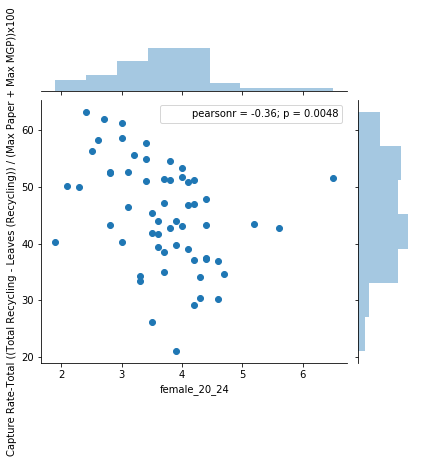

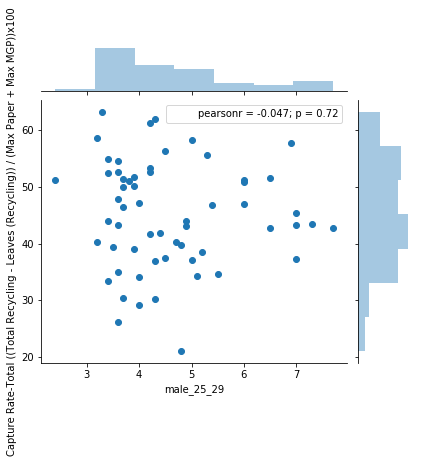

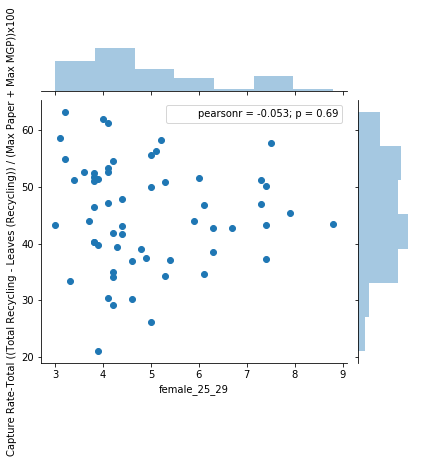

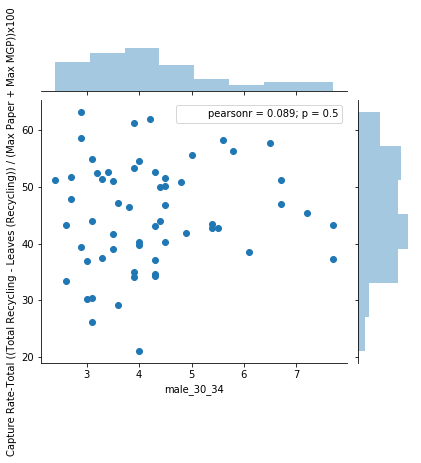

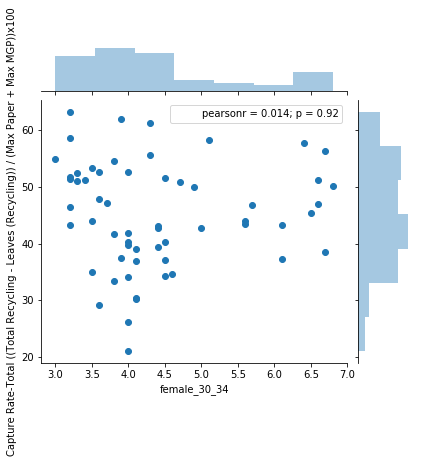

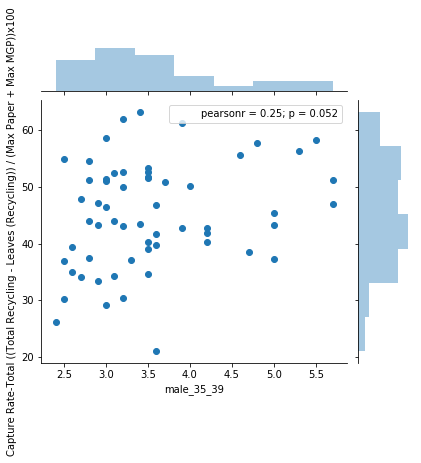

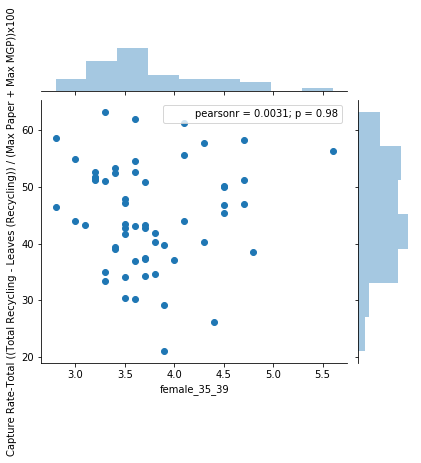

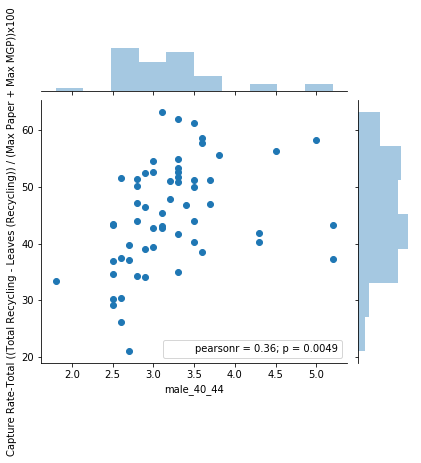

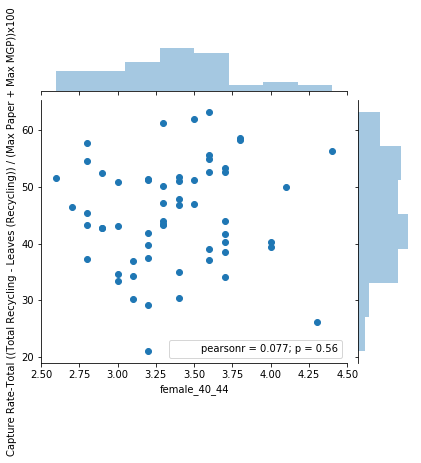

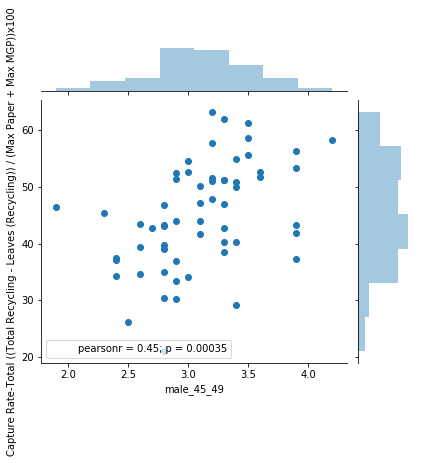

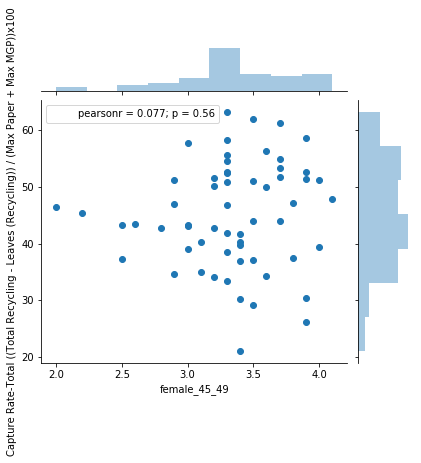

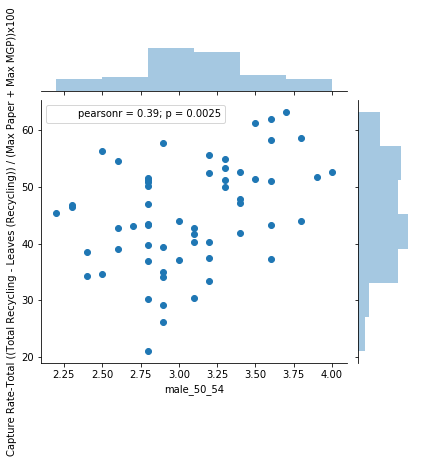

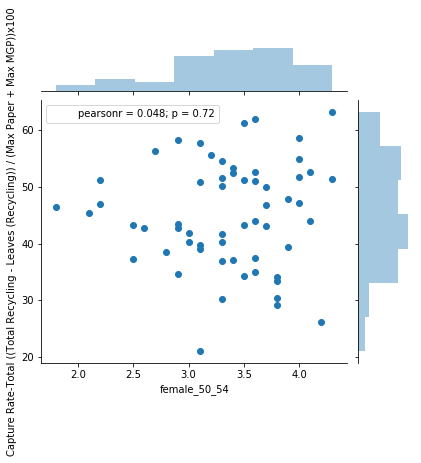

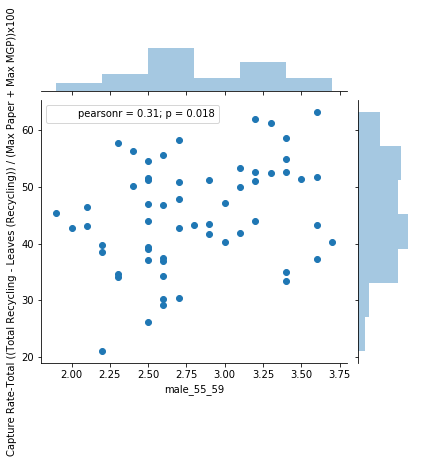

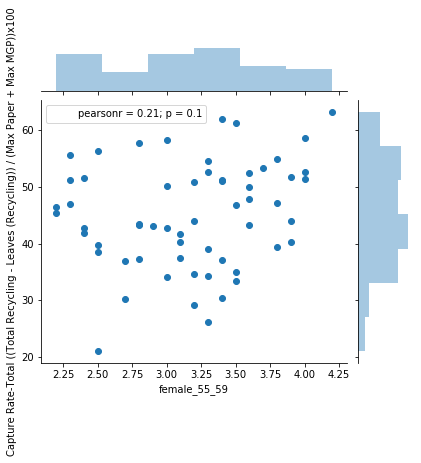

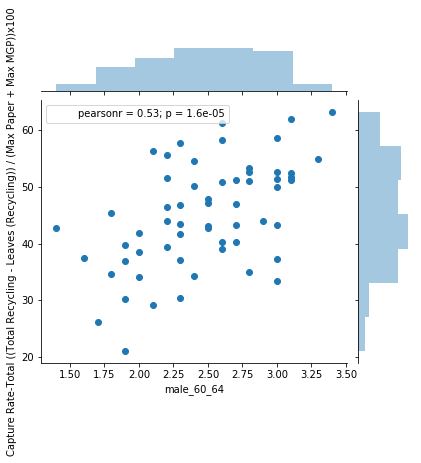

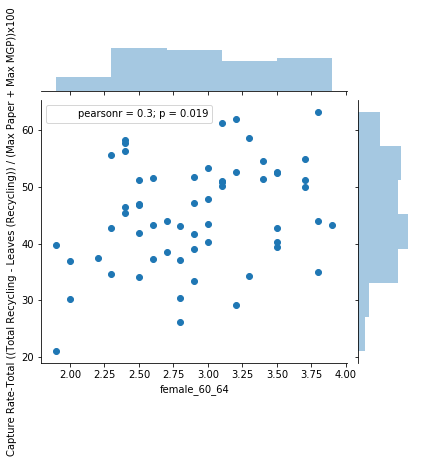

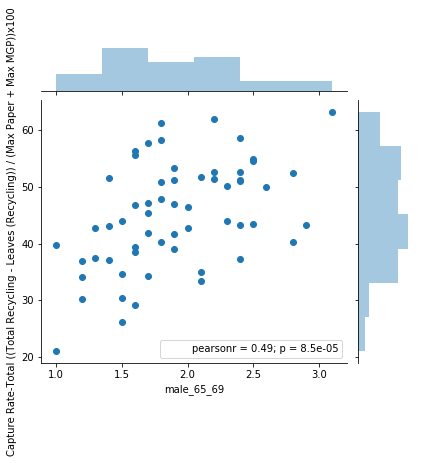

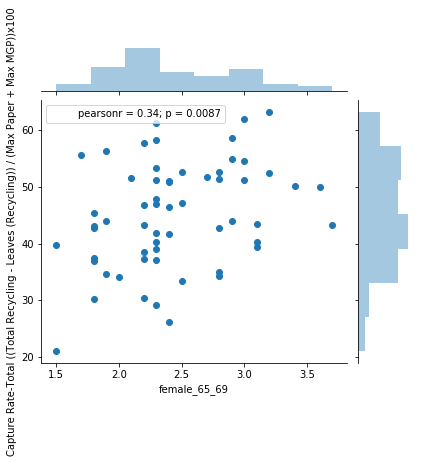

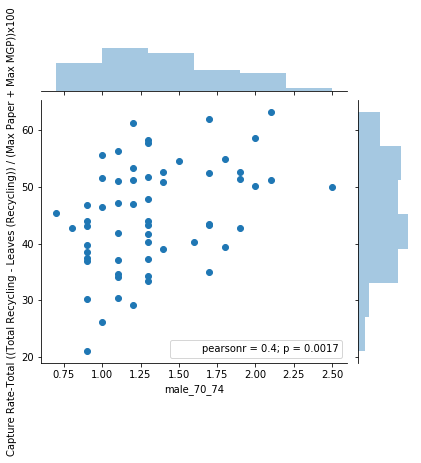

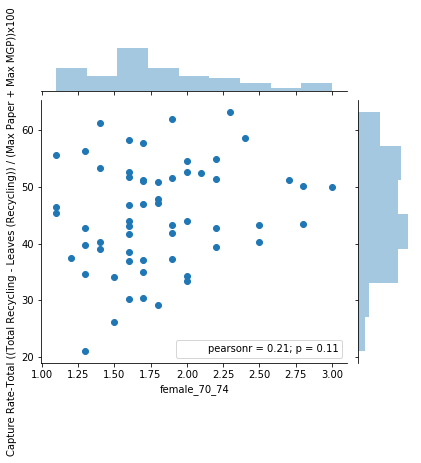

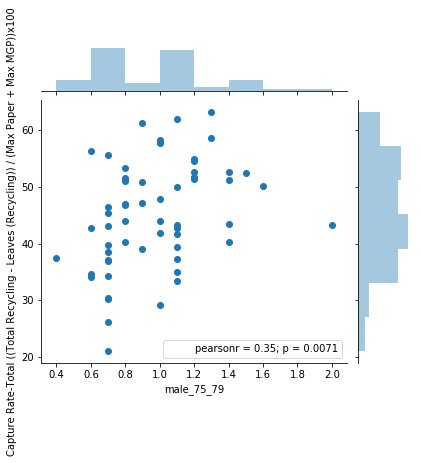

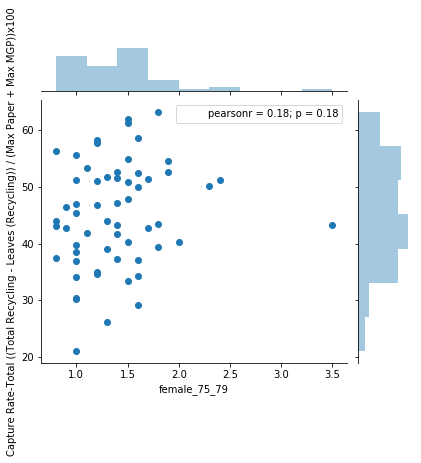

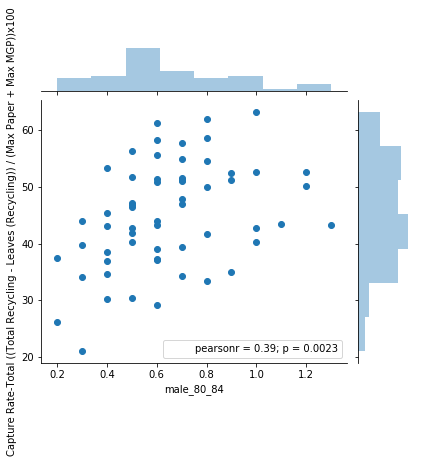

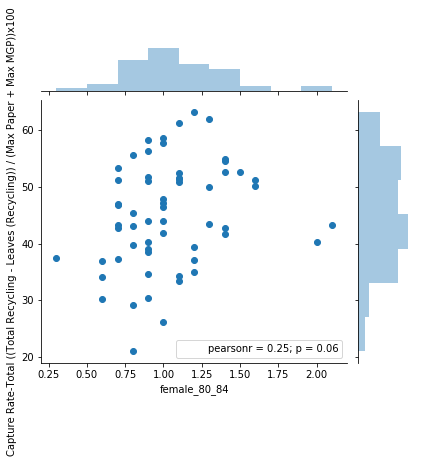

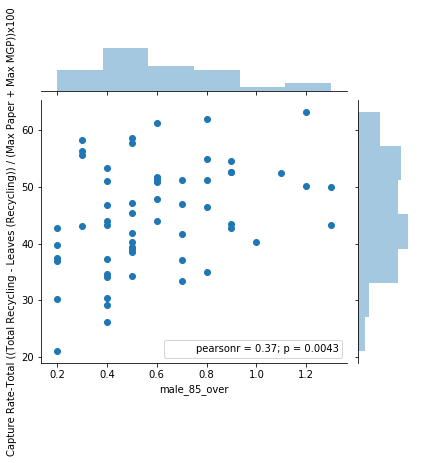

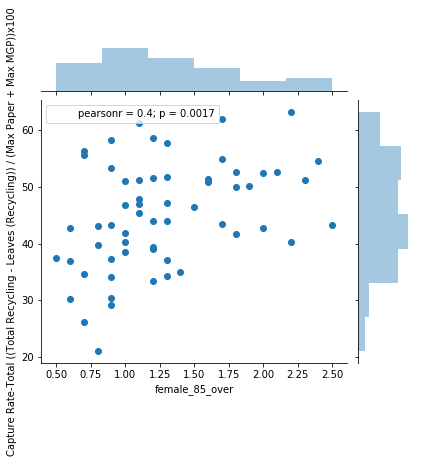

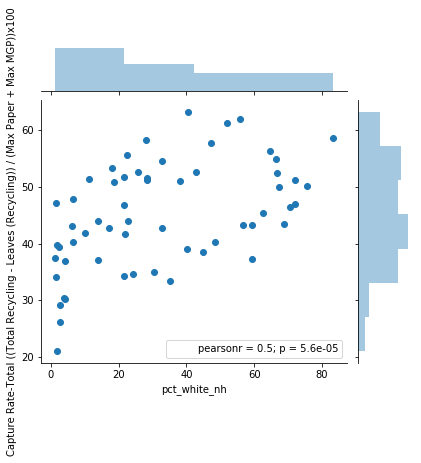

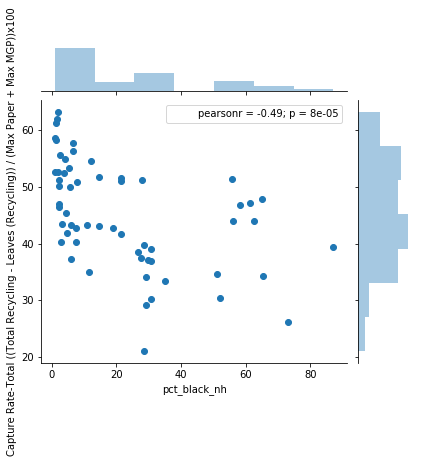

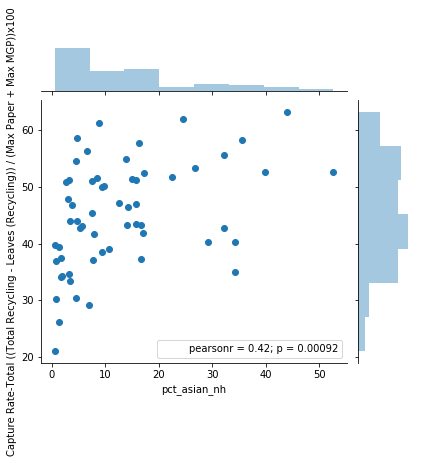

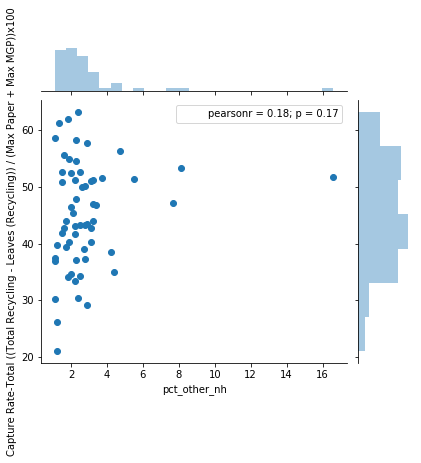

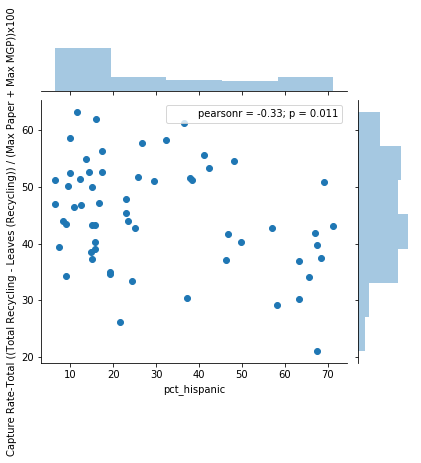

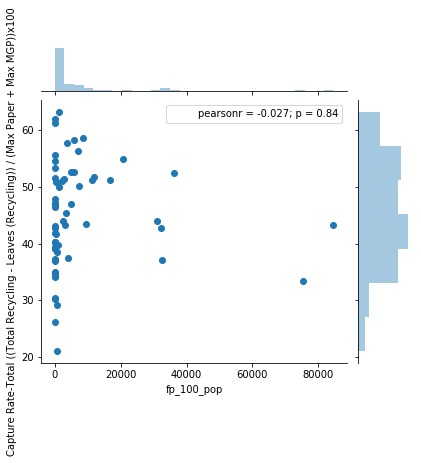

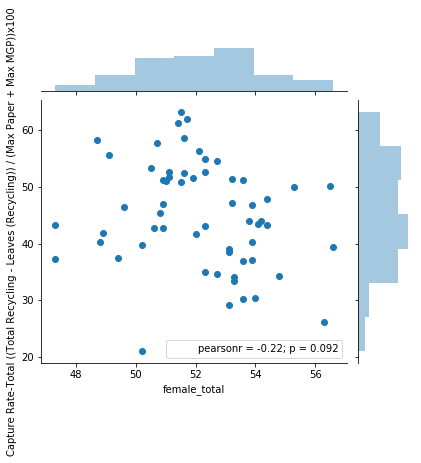

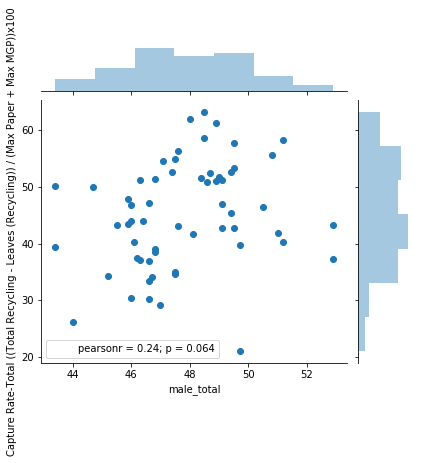

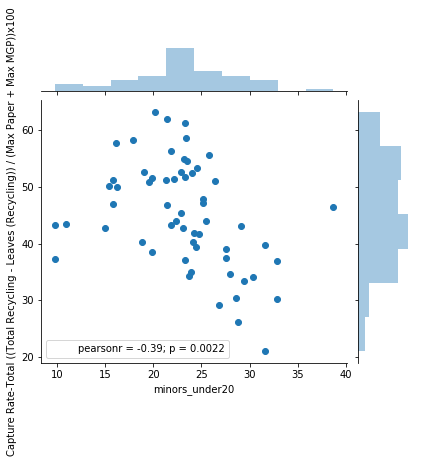

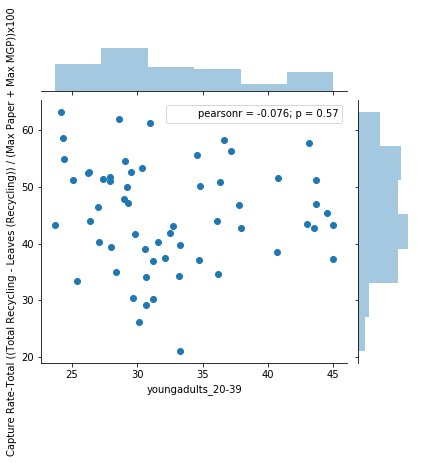

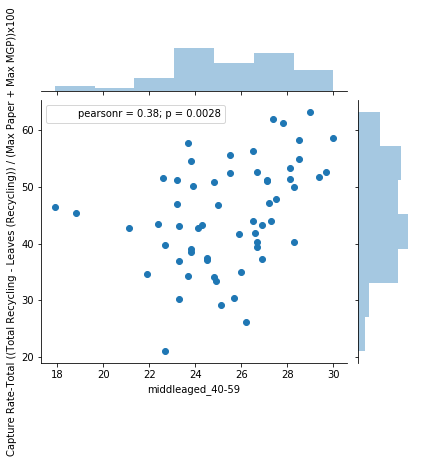

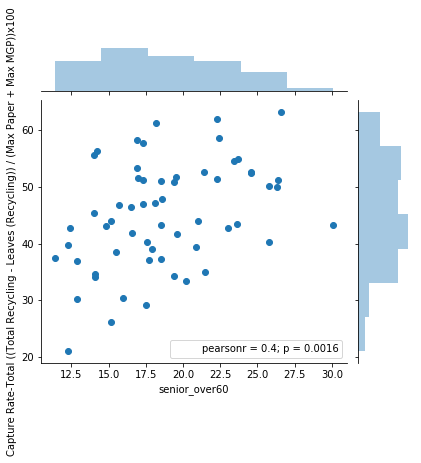

In [25]:
#Jointplots of all variables against Total Capture Rates 
for i in rec_x_variables:
    sns.jointplot(data=df_2016, x=i, y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', kind='scatter').annotate(stats.pearsonr)
    plt.show()

The scatter plots allow us a high level view of which variables may have a significant impact on recycling rates based on the trends visible on the plots along with the annotation of the pearson correlation coefficient. Let's now take a deeper dive into the PearsonR and p-values of each variable to determine which variables are statistically significant with regards to being correlated with diversion and capture rates.

Below we will begin with creating a dictionary of each variable along with its corresponding Pearson correlation coefficient and p-value, creating a separate dictionary for diversion and capture rates. We do this below by running a dictionary comprehension and by using the Scipy.Stats package which includes the function 'pearsonr', which returns a tuple of the correlation and p-value.

In [28]:
#Create dictionary of Pearson Correlation and p-values corresponding to each variable with respect to diversion rate and capture rate
correlation_diversion = {i:stats.pearsonr(df_2016[i], df_2016['Diversion Rate-Total (Total Recycling / Total Waste)']) for i in rec_x_variables}
correlation_capture = {i:stats.pearsonr(df_2016[i], df_2016['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']) for i in rec_x_variables}

Now that we have created the dictionaries of the pearsonr statistics of each x-variable in relation to both the recycling diversion and capture rates, we can narrow down the variables that may have statistical significance by evaluating the correlation and p-value. Typically, a correlation coefficient with an absolute value above 0.5 or with a p-value less than .05 is considered statistically significant. The p-value indicates the probability that the null hypothesis - that the relationship between two variables is random - is true. Therefore, we can filter out any dictionary items where the p-value is less than .05 since we would reject the null hypothesis for those.

In [29]:
#Filter dictionary of all correlation and p-values to only include variables the are statistically significant (p-value less than .05)
diversion_significant = {key:value for key, value in correlation_diversion.items() if value[1] < .05}
capture_significant = {key:value for key, value in correlation_capture.items() if value[1] < .05}
diversion_significant, capture_significant

({'count_public_schools': (-0.50244411544461942, 5.0132862888877539e-05),
  'female_10_14': (-0.63009866876518272, 8.9263677799195257e-08),
  'female_15_19': (-0.54138713657249105, 9.5284085885932834e-06),
  'female_20_24': (-0.37211185462337537, 0.0037067956780281524),
  'female_30_34': (0.38307739015919823, 0.0027475091096344196),
  'female_35_39': (0.32487990416811552, 0.012053810591264078),
  'female_5_9': (-0.53273076316439849, 1.403033460961714e-05),
  'female_65_69': (0.38319629374988606, 0.0027384486045417679),
  'female_70_74': (0.34918662381661175, 0.0067148169531940577),
  'female_85_over': (0.3159887180462152, 0.014766830957496417),
  'female_under_5': (-0.42802078956072964, 0.00072047328422274843),
  'lep_rate': (-0.26179166014668531, 0.045186350694016345),
  'male_10_14': (-0.64005325500704113, 4.8092587820312105e-08),
  'male_15_19': (-0.70741162417630921, 3.7611552512423639e-10),
  'male_20_24': (-0.63989503738269671, 4.8576117509163626e-08),
  'male_30_34': (0.36872307

After filtering the dictionary, we see the key-value pairs of variables and correlation that are statistically significant. Upon reviewing these, there are a handful of features that overlap with one another, and therefore can may be redundant to analyze and unlikely to advance a model. 

As highlighted in the data wrangling portion, the age groups were condensed into 4 larger ranges since they more closely represent generational differences and can be viewed in that scope, and so we will exclude the narrower age ranges in favor of the larger ones - minors, young adults, middle aged, and seniors. Likewise, there are a few fields just below the .05 threshold including 'lep_rate' and 'crime_per_1000' that are similar metrics to others and are unlikely to offer additional insights, so we will exclude those.

With the remaining variables in our dictionaries of statistically significant variables, let's break them down into categories. Below each variable has been separated into 4 categories - economic, community, race, and age. These represent what type of indicator the variable is. 

In [30]:
#Create sublists of categories of variables - Economic, Community, Race, Age Groups
economic = ['poverty_rate', 'pct_bach_deg', 'unemployment_cd', 'mean_commute']
community = ['pct_hh_rent_burd', 'pct_clean_strts', 'count_public_schools', 'count_hosp_clinic']
race = ['pct_black_nh', 'pct_white_nh', 'pct_hispanic', 'pct_asian_nh']
age = ['minors_under20', 'youngadults_20-39', 'middleaged_40-59', 'senior_over60']
comb_var = economic + community + race + age

With the statistically significant variables broken out into lists, we may be interested in determining if each of the variables in a specific category are correlated with one another or if they are independent. Knowing this will provide insights into which variables are important for feature selection and help choose what ML models to fit.

We can examine this by plotting a covariance matrix heatmap. Below we will separate the variable lists into the 16 fields above and examine the covariance matrix to see what variables may be related to one another.

In [62]:
df_corr_x = df_2016[comb_var]
#del rec_y_rates[1:3]
df_corr_xy = df_2016[rec_y_rates + comb_var]

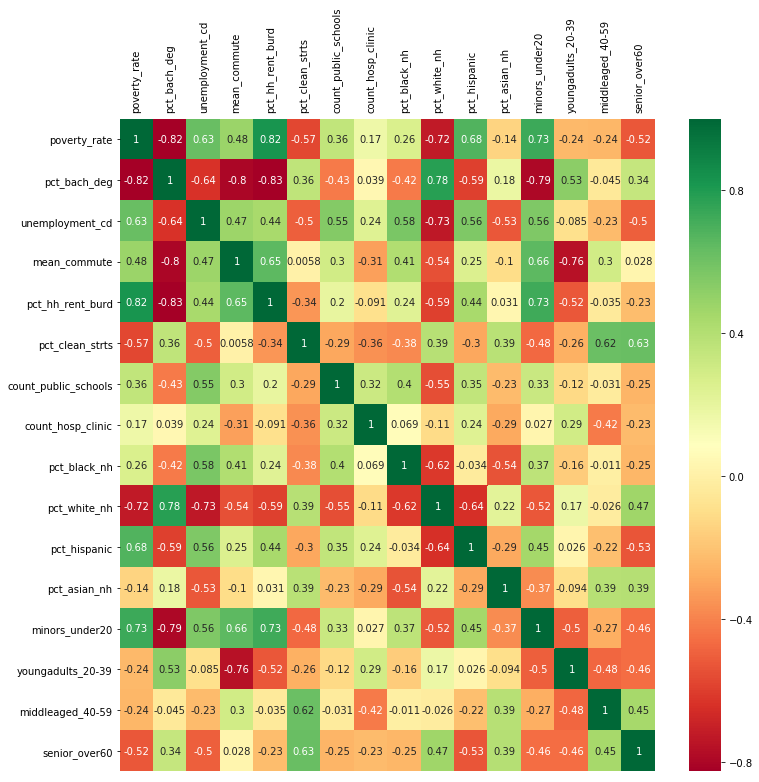

In [63]:
#Correlation matrix between each variable 
corr = df_corr_x.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.tick_params(labeltop=True, labelbottom=False, bottom=False)
plt.xticks(rotation=90)
plt.show()

/Users/varunraja/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


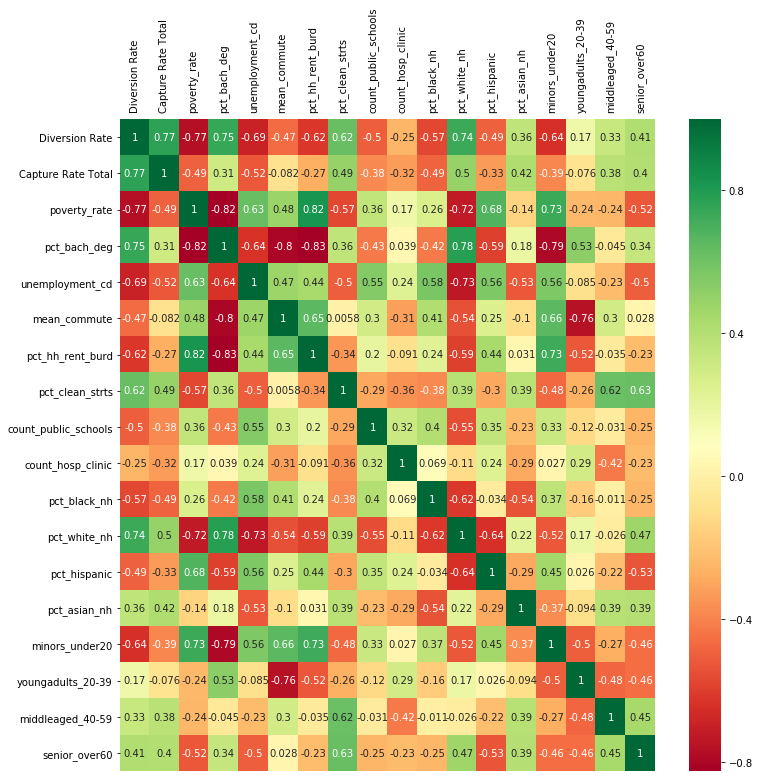

In [71]:
df_corr_xy.rename(columns={"Diversion Rate-Total (Total Recycling / Total Waste)": "Diversion Rate", "Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100": "Capture Rate Total"}, inplace=True)

#Correlation Matrix including Y-variables (rates) 
corr = df_corr_xy.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.tick_params(labeltop=True, labelbottom=False, bottom=False)
plt.xticks(rotation=90)
plt.show()

The above correlation heatmap shows us the relationship between each X-variable against one another as well as against the Y-variables (recycling diversion and total capture rate) with the pearson correlation in each box along with a color map with darker green reprenting higher positive correlation and darker red representing higher negative correlation.

The first two columns of the heatmap allow us to see a quick overview of the relationships between each variable and the rates. One takeaway from this are that the highest positive correlation to diversion rate is the percentage of people in a district with a bachelor degree while the highest negative correlation is the poverty rate of a district. For capture rate, the highest postively correlated variable is percentage of white people while the negative is percentage unemployed. This indicates the likely feature importance in a univariate analysis, but it's important to note that combining features in a multivariate model may not yield the same results. 

The other takeaway is that the relationship between diversion and capture rate is postive as they are similar metrics, however based on the differences between correlation of each variable to the two they can clearly be impacted differently, as evidenced by the largely lower correlation to capture rate than diversion for most variables.

From the third column and row onward, we can observe the relationships between each X-variable. Doing so will help us understand whether each variable is independent of one another, and if not, what their levels of dependence on each other is. One of the most evident relationship include the connection between rent burden, poverty rate, and percentage under 20 in a district, as evidenced by the correlations between the 3 being above 0.70. This can be reasonably implied given that poverty rate and rent burden are directly related based on income level, while poverty rates tend to be higher among families with more children.

Another interesting relationship is between the percentage of people with bachelors degree and percentage white, suggesting a higher level of education and wealth among the white population of NYC.

We can utilize these relationships when determining feature selection and modeling when incorporating machine learning techniques in the next section.